In [1]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None
import glob
import openpyxl
import numpy as np
from statistics import mean, median
from datetime import datetime, timedelta
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading in-situ data from location.ipynb

In [2]:
#Loading in-situ data from location.ipyn
%store -r data_Split_2019
data_Split_2019

,img_type,date,lat,long,repl_img_type,I-S(mg/m3),coordinates
318,s3olci,2019-03-04 12:35:00,43.503417,16.204961,NaN,0.30,"(43.50342, 16.20496)"
147,s3olci,2019-04-14 19:35:00,43.487667,15.721500,NaN,0.20,"(43.48767, 15.7215)"
135,s3olci,2019-04-15 08:10:00,43.518333,16.381667,NaN,0.81,"(43.51833, 16.38167)"
136,s3olci,2019-07-22 08:39:00,43.518333,16.381667,NaN,0.13,"(43.51833, 16.38167)"
255,s3olci,2019-07-27 11:02:00,43.503183,16.433800,NaN,0.50,"(43.50318, 16.4338)"
319,s3olci,2019-07-28 16:08:00,43.503417,16.204961,NaN,0.74,"(43.50342, 16.20496)"
254,s3olci,2019-08-04 11:50:00,43.503183,16.433800,NaN,0.34,"(43.50318, 16.4338)"
635,s3olci,2019-03-19 07:35:00,43.518333,16.381667,NaN,1.03,"(43.51833, 16.38167)"
645,s3olci,2019-03-19 08:40:00,43.530000,16.453333,NaN,1.05,"(43.53, 16.45333)"
611,s3olci,2019-03-19 14:30:00,43.426719,16.393519,NaN,0.35,"(43.42672, 16.39352)"


In [3]:
in_situ_Split_2019 = data_Split_2019
in_situ_Split_2019

,img_type,date,lat,long,repl_img_type,I-S(mg/m3),coordinates
318,s3olci,2019-03-04 12:35:00,43.503417,16.204961,NaN,0.30,"(43.50342, 16.20496)"
147,s3olci,2019-04-14 19:35:00,43.487667,15.721500,NaN,0.20,"(43.48767, 15.7215)"
135,s3olci,2019-04-15 08:10:00,43.518333,16.381667,NaN,0.81,"(43.51833, 16.38167)"
136,s3olci,2019-07-22 08:39:00,43.518333,16.381667,NaN,0.13,"(43.51833, 16.38167)"
255,s3olci,2019-07-27 11:02:00,43.503183,16.433800,NaN,0.50,"(43.50318, 16.4338)"
319,s3olci,2019-07-28 16:08:00,43.503417,16.204961,NaN,0.74,"(43.50342, 16.20496)"
254,s3olci,2019-08-04 11:50:00,43.503183,16.433800,NaN,0.34,"(43.50318, 16.4338)"
635,s3olci,2019-03-19 07:35:00,43.518333,16.381667,NaN,1.03,"(43.51833, 16.38167)"
645,s3olci,2019-03-19 08:40:00,43.530000,16.453333,NaN,1.05,"(43.53, 16.45333)"
611,s3olci,2019-03-19 14:30:00,43.426719,16.393519,NaN,0.35,"(43.42672, 16.39352)"


# Loading data from pictures

Data is taken for:
- Satellite: Sentinel 3
- Instrument: OLSCI
- Image type: s3olci
- Dates: from 2019-03-01 to 2019-08-31
- Location: (43.518333, 16.381667)

In [4]:
path = r'../data/raw/(43.518333, 16.381667),2019'

In [5]:
all_files = glob.glob(os.path.join(path, "*.csv"))
df_Split_2019 = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
print('There are', len(df_Split_2019), 'images')

There are 223 images


## Analiza podataka

In [6]:
df_Split_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Columns: 125 entries, Oa01_reflectance to content_end_date
dtypes: float64(122), object(3)
memory usage: 217.9+ KB


In [7]:
df_Split_2019.describe()

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,TSM_NN,TSM_NN_err,A865,A865_err,T865,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,2.180000e+02,2.180000e+02,2.230000e+02,223.000000
mean,0.358143,0.353968,0.358313,0.353864,0.359752,0.353695,0.362957,0.353531,0.361295,0.353490,...,34.393806,33.893774,1.576544,2.511024,0.704905,1.606299,1.521803e+08,2.898284e+06,4.351833e+01,16.381667
std,0.475934,0.478521,0.475751,0.478597,0.474518,0.478723,0.472051,0.478844,0.473255,0.478875,...,48.273968,48.620341,0.828802,0.000000,0.682316,0.000000,1.359035e+08,3.151900e+06,7.121413e-15,0.000000
min,-0.195074,0.000342,-0.182897,0.000287,-0.147649,0.000232,-0.105661,0.000177,-0.097623,0.000159,...,0.202809,0.051128,0.074803,2.511024,0.037795,1.606299,1.000000e+00,0.000000e+00,4.351833e+01,16.381667
25%,0.001207,0.000726,0.002484,0.000639,0.007044,0.000443,0.011969,0.000291,0.009973,0.000269,...,0.559798,0.117724,0.686614,2.511024,0.119685,1.606299,8.000000e+00,0.000000e+00,4.351833e+01,16.381667
50%,0.020347,0.001825,0.019202,0.001578,0.020228,0.001102,0.023679,0.000653,0.020246,0.000562,...,1.361224,0.247612,1.640157,2.511024,0.283465,1.606299,2.192855e+08,2.490368e+06,4.351833e+01,16.381667
75%,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,103.692660,103.692660,2.511024,2.511024,1.606299,1.606299,2.684390e+08,5.226520e+06,4.351833e+01,16.381667
max,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,103.692660,103.692660,2.511024,2.511024,1.606299,1.606299,3.187712e+08,1.363159e+07,4.351833e+01,16.381667


In [8]:
#checking if we have missing values
df_Split_2019.isnull()

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,A865_err,T865,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude,in_date,content_start_date,content_end_date
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
219,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
221,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df_Split_2019.dropna

<bound method DataFrame.dropna of      Oa01_reflectance  Oa01_reflectance_err  Oa02_reflectance  \
0            0.000452              0.002319          0.001276   
1            0.012500              0.001569          0.011457   
2            1.000018              1.000018          1.000018   
3            1.000018              1.000018          1.000018   
4            1.000018              1.000018          1.000018   
..                ...                   ...               ...   
218          1.000018              1.000018          1.000018   
219         -0.004877              0.001715         -0.003211   
220         -0.000409              0.000690          0.000836   
221          0.050038              0.000616          0.048885   
222          0.040168              0.000488          0.038520   

     Oa02_reflectance_err  Oa03_reflectance  Oa03_reflectance_err  \
0                0.001971          0.008673              0.001386   
1                0.001331          0.014698    

In [10]:
# oldest date within data
df_Split_2019['content_start_date'].min()

'2019-03-01 09:01:55'

In [11]:
# most recent date within data
df_Split_2019['content_start_date'].max()

'2019-08-31 09:18:32'

In [12]:
# How many unique values of lat and long are in dataset

print("Unique lat values:",df_Split_2019.latitude.unique().size)
print("Unique long values:",df_Split_2019.longitude.unique().size)

Unique lat values: 212
Unique long values: 209


In [13]:
#creating new column, coordinates
df_Split_2019["coordinates"] = list(zip(df_Split_2019.latitude.round(5), df_Split_2019.longitude.round(5)))

In [14]:
df_Split_2019["coordinates"].unique()

array([(43.518, 16.38104), (43.51714, 16.3822), (43.518, 16.37918),
       (43.51796, 16.38055), (43.51865, 16.3804), (43.51805, 16.38328),
       (43.51876, 16.38449), (43.51811, 16.38221), (43.51802, 16.38288),
       (43.51706, 16.3834), (43.51924, 16.38381), (43.51901, 16.38191),
       (43.51952, 16.38038), (43.51789, 16.38019), (43.51787, 16.38026),
       (43.51744, 16.3794), (43.51863, 16.38352), (43.51898, 16.38123),
       (43.51823, 16.38399), (43.51727, 16.38032), (43.51842, 16.38241),
       (43.51946, 16.3831), (43.51681, 16.3827), (43.51878, 16.38175),
       (43.51929, 16.3804), (43.51844, 16.38341), (43.51921, 16.38241),
       (43.51959, 16.37935), (43.51747, 16.381), (43.51885, 16.38254),
       (43.51729, 16.38106), (43.51905, 16.38033), (43.51889, 16.38341),
       (43.51828, 16.38006), (43.51745, 16.38041), (43.51837, 16.38148),
       (43.5176, 16.38253), (43.51828, 16.38286), (43.51737, 16.3842),
       (43.51923, 16.38307), (43.51922, 16.38136), (43.51802, 16.3

In [15]:
print("Unique coordinates values:",df_Split_2019.coordinates.unique().size)

Unique coordinates values: 220


In [16]:
# dataframe locations on map

import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_Split_2019,lat="latitude",lon="longitude",title="Extracted image data Locations",color_continuous_scale=color_scale,zoom=6,height=300,width=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [17]:
### Getting the difference between the time the image was staring to be made (content_start_date), and the time it was finished (content_end_date)

time_diff = (datetime.strptime(df_Split_2019['content_end_date'][0], '%Y-%m-%d %H:%M:%S') - datetime.strptime(df_Split_2019['content_start_date'][0], '%Y-%m-%d %H:%M:%S'))

print(time_diff)


0:03:00


## Analysing CHL_NN and CHL_OC4ME


In [18]:
df_Split_2019["CHL_NN"].describe()

count    218.000000
mean      33.952597
std       48.579424
min        0.065902
25%        0.202809
50%        0.313374
75%      103.692660
max      103.692660
Name: CHL_NN, dtype: float64

In [19]:
df_Split_2019["CHL_NN_err"].describe()

count    218.000000
mean      33.830935
std       48.664049
min        0.034311
25%        0.070859
50%        0.105590
75%      103.692660
max      103.692660
Name: CHL_NN_err, dtype: float64

2019-03-01 09:01:55
2019-08-31 09:18:32


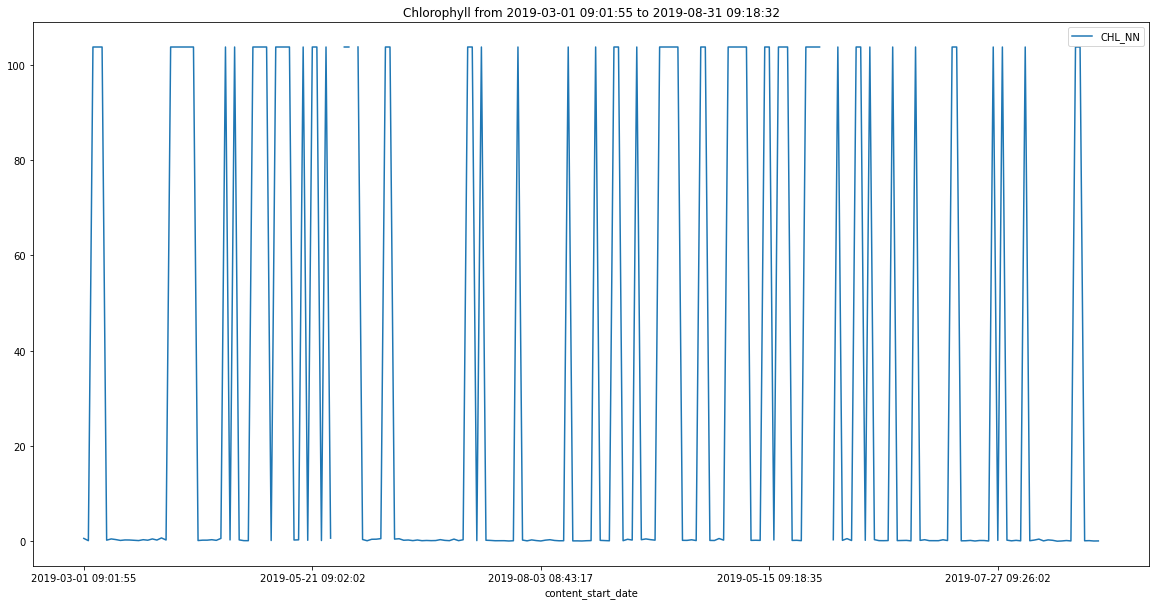

In [20]:
 # oldest date within data

start_date = df_Split_2019['content_start_date'].min()
print(start_date)

# recent date within data

end_date = df_Split_2019['content_start_date'].max()
print(end_date)

df_Split_2019.plot(x='content_start_date', y='CHL_NN', title='Chlorophyll from {} to {}'.format(start_date, end_date), figsize=(20,10))

# Show the plot
plt.show()

ili


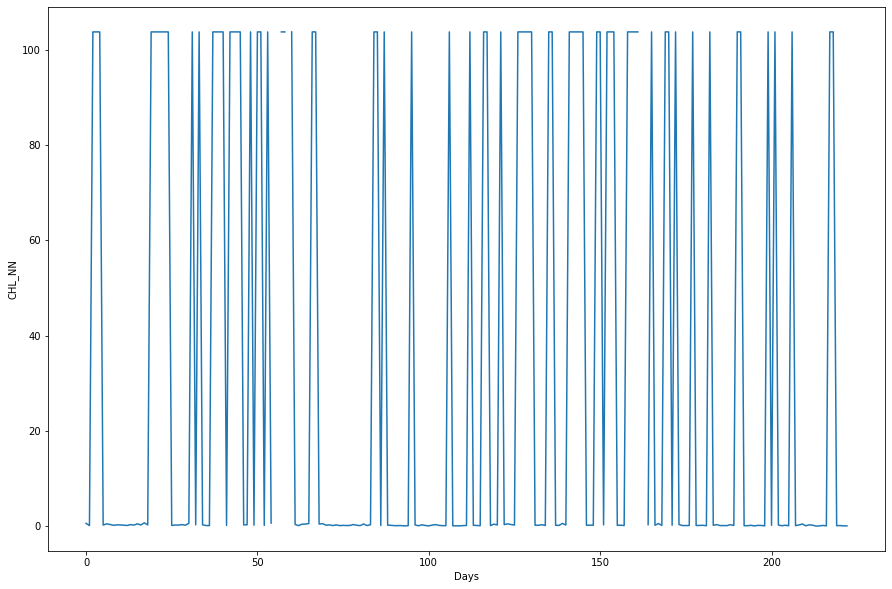

In [21]:
plt.figure(figsize=(15,10))
plt.plot(df_Split_2019['CHL_NN'])
plt.xlabel('Days')
plt.ylabel('CHL_NN')
plt.show()

In [22]:
df_Split_2019["CHL_OC4ME"].describe()

count    218.000000
mean      48.016920
std       51.374638
min        0.010000
25%        0.520637
50%        2.103323
75%      103.692660
max      103.692660
Name: CHL_OC4ME, dtype: float64

In [23]:
df_Split_2019["CHL_OC4ME_err"].describe()

count    218.000000
mean      47.587377
std       51.767987
min        0.010000
25%        0.019207
50%        0.098785
75%      103.692660
max      103.692660
Name: CHL_OC4ME_err, dtype: float64

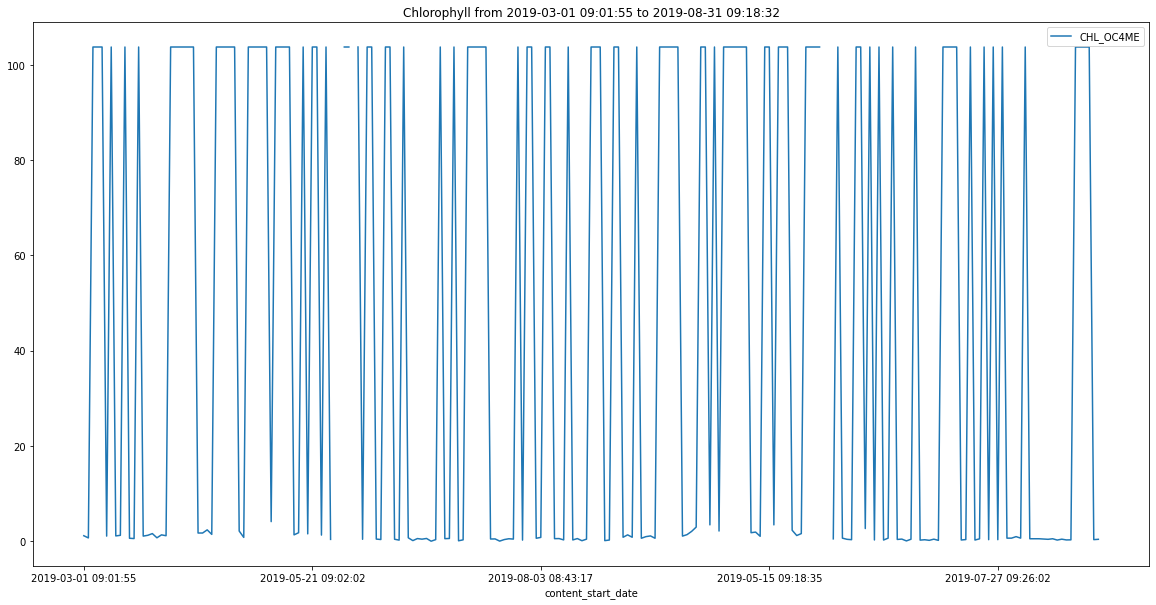

In [24]:

df_Split_2019.plot(x='content_start_date', y='CHL_OC4ME', title='Chlorophyll from {} to {}'.format(start_date, end_date), figsize=(20,10))

# Show the plot
plt.show()

## Droping NaN values from CHL_NN and CHL_OC4ME

In [25]:
df_Split_2019_true = df_Split_2019[df_Split_2019['CHL_NN'] < 100]

df_Split_2019_true = df_Split_2019_true[df_Split_2019_true['CHL_OC4ME'] < 100]

df_Split_2019_true = df_Split_2019_true.reset_index(drop=True)

df_Split_2019_true

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,T865,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude,in_date,content_start_date,content_end_date,coordinates
0,0.000452,0.002319,0.001276,0.001971,0.008673,0.001386,0.019221,0.000836,0.017481,0.000690,...,0.119685,1.606299,301989890.0,5226528.0,43.518333,16.381667,2019-03-01 00:00:00,2019-03-01 09:01:55,2019-03-01 09:04:55,"(43.518, 16.38104)"
1,0.012500,0.001569,0.011457,0.001331,0.014698,0.000928,0.020338,0.000543,0.017499,0.000452,...,0.075591,1.606299,268435458.0,32.0,43.518333,16.381667,2019-03-04 00:00:00,2019-03-04 09:24:21,2019-03-04 09:27:21,"(43.51714, 16.3822)"
2,0.017994,0.002503,0.014881,0.002136,0.019001,0.001550,0.026875,0.000928,0.024805,0.000781,...,0.069291,1.606299,301989890.0,64.0,43.518333,16.381667,2019-03-12 00:00:00,2019-03-12 09:16:51,2019-03-12 09:19:51,"(43.51805, 16.38328)"
3,0.019861,0.001459,0.018360,0.001221,0.022864,0.000818,0.029676,0.000470,0.027076,0.000378,...,0.044094,1.606299,268437506.0,2097248.0,43.518333,16.381667,2019-03-15 00:00:00,2019-03-15 09:39:18,2019-03-15 09:42:18,"(43.51811, 16.38221)"
4,0.005579,0.000726,0.005872,0.000598,0.010706,0.000415,0.020301,0.000250,0.018580,0.000214,...,0.132283,1.606299,268435458.0,5079040.0,43.518333,16.381667,2019-03-16 00:00:00,2019-03-16 09:13:07,2019-03-16 09:16:07,"(43.51802, 16.38288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.001086,0.002173,0.000745,0.001843,0.006384,0.001276,0.012134,0.000745,0.010028,0.000616,...,0.081890,1.606299,268435458.0,4702240.0,43.518333,16.381667,2019-08-17 00:00:00,2019-08-17 08:41:09,2019-08-17 08:44:09,"(43.51788, 16.3827)"
114,0.001550,0.000433,0.003601,0.000360,0.006696,0.000269,0.010504,0.000195,0.007208,0.000195,...,0.151181,1.606299,268439554.0,1556544.0,43.518333,16.381667,2019-08-19 00:00:00,2019-08-19 09:29:46,2019-08-19 09:32:46,"(43.51879, 16.38205)"
115,0.006879,0.001715,0.008747,0.001440,0.010157,0.000983,0.012537,0.000562,0.008399,0.000470,...,0.069291,1.606299,268435458.0,5472352.0,43.518333,16.381667,2019-08-20 00:00:00,2019-08-20 09:03:35,2019-08-20 09:06:35,"(43.51764, 16.38322)"
116,0.050038,0.000616,0.048885,0.000525,0.036634,0.000397,0.030354,0.000269,0.023103,0.000232,...,0.157480,1.606299,268435458.0,13631588.0,43.518333,16.381667,2019-08-28 00:00:00,2019-08-28 08:56:05,2019-08-28 08:59:05,"(43.51889, 16.38446)"


Pojedinačno razdvajanje tablica za CHL_NN I CHL_OC4ME 
(jer ako je CHL_NN nevaljan ne mora značiti da je i CHL_OC4ME nevaljano)

In [26]:
df_Split_2019_trueNN = df_Split_2019[df_Split_2019['CHL_NN'] < 100]


df_Split_2019_trueNN = df_Split_2019_trueNN.reset_index(drop=True)
df_Split_2019_trueNN

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,T865,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude,in_date,content_start_date,content_end_date,coordinates
0,0.000452,0.002319,0.001276,0.001971,0.008673,0.001386,0.019221,0.000836,0.017481,0.000690,...,0.119685,1.606299,301989890.0,5226528.0,43.518333,16.381667,2019-03-01 00:00:00,2019-03-01 09:01:55,2019-03-01 09:04:55,"(43.518, 16.38104)"
1,0.012500,0.001569,0.011457,0.001331,0.014698,0.000928,0.020338,0.000543,0.017499,0.000452,...,0.075591,1.606299,268435458.0,32.0,43.518333,16.381667,2019-03-04 00:00:00,2019-03-04 09:24:21,2019-03-04 09:27:21,"(43.51714, 16.3822)"
2,0.017994,0.002503,0.014881,0.002136,0.019001,0.001550,0.026875,0.000928,0.024805,0.000781,...,0.069291,1.606299,301989890.0,64.0,43.518333,16.381667,2019-03-12 00:00:00,2019-03-12 09:16:51,2019-03-12 09:19:51,"(43.51805, 16.38328)"
3,-0.023225,0.001422,-0.023719,0.001349,-0.011597,0.001147,0.002081,0.000891,0.001367,0.000781,...,0.359055,1.606299,19136514.0,6276928.0,43.518333,16.381667,2019-03-13 00:00:00,2019-03-13 08:50:40,2019-03-13 08:53:40,"(43.51876, 16.38449)"
4,0.019861,0.001459,0.018360,0.001221,0.022864,0.000818,0.029676,0.000470,0.027076,0.000378,...,0.044094,1.606299,268437506.0,2097248.0,43.518333,16.381667,2019-03-15 00:00:00,2019-03-15 09:39:18,2019-03-15 09:42:18,"(43.51811, 16.38221)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.006879,0.001715,0.008747,0.001440,0.010157,0.000983,0.012537,0.000562,0.008399,0.000470,...,0.069291,1.606299,268435458.0,5472352.0,43.518333,16.381667,2019-08-20 00:00:00,2019-08-20 09:03:35,2019-08-20 09:06:35,"(43.51764, 16.38322)"
143,-0.004877,0.001715,-0.003211,0.001605,-0.003009,0.001367,0.000159,0.001019,-0.002387,0.000891,...,0.384252,1.606299,136577026.0,5234752.0,43.518333,16.381667,2019-08-24 00:00:00,2019-08-24 08:59:50,2019-08-24 09:02:50,"(43.51875, 16.37974)"
144,-0.000409,0.000690,0.000836,0.000580,0.001770,0.000433,0.004553,0.000323,0.001825,0.000323,...,0.239370,1.606299,136579074.0,5226560.0,43.518333,16.381667,2019-08-27 00:00:00,2019-08-27 09:22:16,2019-08-27 09:25:16,"(43.51926, 16.38131)"
145,0.050038,0.000616,0.048885,0.000525,0.036634,0.000397,0.030354,0.000269,0.023103,0.000232,...,0.157480,1.606299,268435458.0,13631588.0,43.518333,16.381667,2019-08-28 00:00:00,2019-08-28 08:56:05,2019-08-28 08:59:05,"(43.51889, 16.38446)"


In [27]:
df_Split_2019_trueOC4ME = df_Split_2019[df_Split_2019['CHL_OC4ME'] < 100]

df_Split_2019_trueOC4ME = df_Split_2019_trueOC4ME.reset_index(drop=True)

df_Split_2019_trueOC4ME

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,T865,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude,in_date,content_start_date,content_end_date,coordinates
0,0.000452,0.002319,0.001276,0.001971,0.008673,0.001386,0.019221,0.000836,0.017481,0.000690,...,0.119685,1.606299,301989890.0,5226528.0,43.518333,16.381667,2019-03-01 00:00:00,2019-03-01 09:01:55,2019-03-01 09:04:55,"(43.518, 16.38104)"
1,0.012500,0.001569,0.011457,0.001331,0.014698,0.000928,0.020338,0.000543,0.017499,0.000452,...,0.075591,1.606299,268435458.0,32.0,43.518333,16.381667,2019-03-04 00:00:00,2019-03-04 09:24:21,2019-03-04 09:27:21,"(43.51714, 16.3822)"
2,0.017994,0.002503,0.014881,0.002136,0.019001,0.001550,0.026875,0.000928,0.024805,0.000781,...,0.069291,1.606299,301989890.0,64.0,43.518333,16.381667,2019-03-12 00:00:00,2019-03-12 09:16:51,2019-03-12 09:19:51,"(43.51805, 16.38328)"
3,0.019861,0.001459,0.018360,0.001221,0.022864,0.000818,0.029676,0.000470,0.027076,0.000378,...,0.044094,1.606299,268437506.0,2097248.0,43.518333,16.381667,2019-03-15 00:00:00,2019-03-15 09:39:18,2019-03-15 09:42:18,"(43.51811, 16.38221)"
4,0.005579,0.000726,0.005872,0.000598,0.010706,0.000415,0.020301,0.000250,0.018580,0.000214,...,0.132283,1.606299,268435458.0,5079040.0,43.518333,16.381667,2019-03-16 00:00:00,2019-03-16 09:13:07,2019-03-16 09:16:07,"(43.51802, 16.38288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.001086,0.002173,0.000745,0.001843,0.006384,0.001276,0.012134,0.000745,0.010028,0.000616,...,0.081890,1.606299,268435458.0,4702240.0,43.518333,16.381667,2019-08-17 00:00:00,2019-08-17 08:41:09,2019-08-17 08:44:09,"(43.51788, 16.3827)"
114,0.001550,0.000433,0.003601,0.000360,0.006696,0.000269,0.010504,0.000195,0.007208,0.000195,...,0.151181,1.606299,268439554.0,1556544.0,43.518333,16.381667,2019-08-19 00:00:00,2019-08-19 09:29:46,2019-08-19 09:32:46,"(43.51879, 16.38205)"
115,0.006879,0.001715,0.008747,0.001440,0.010157,0.000983,0.012537,0.000562,0.008399,0.000470,...,0.069291,1.606299,268435458.0,5472352.0,43.518333,16.381667,2019-08-20 00:00:00,2019-08-20 09:03:35,2019-08-20 09:06:35,"(43.51764, 16.38322)"
116,0.050038,0.000616,0.048885,0.000525,0.036634,0.000397,0.030354,0.000269,0.023103,0.000232,...,0.157480,1.606299,268435458.0,13631588.0,43.518333,16.381667,2019-08-28 00:00:00,2019-08-28 08:56:05,2019-08-28 08:59:05,"(43.51889, 16.38446)"


In [28]:
for i in range(len(df_Split_2019_true)):
        print(df_Split_2019_true['CHL_OC4ME'][i], df_Split_2019_true['CHL_OC4ME_err'][i])

1.1560912609254648 0.05497401765201165
0.695856483712199 0.017863580153848188
1.0752168344534188 0.08808092893927416
1.1149209774291358 0.020651929259001608
1.2430488072367822 0.05112830728403299
0.6241307553284376 0.018523222114204138
0.5597981895185683 0.014901443683135148
1.0752168344534188 0.020651929259001608
1.2430488072367822 0.044225147386693
1.6022283105766466 0.07347536108902983
0.7215521242886727 0.01722742911279232
1.3365470265174912 0.029678431383628443
1.1560912609254648 0.03557796473518519
1.7227428817245514 0.07347536108902983
1.7227428817245514 0.33694502580619395
2.3875514937582674 0.17542621113208234
1.437077887604194 0.044225147386693
2.1414535210412717 0.113531952363245
0.8044736134792203 0.019207222434536902
4.113137411186195 0.3622889702474445
1.3365470265174912 0.044225147386693
1.7863579847387832 0.06590185431611571
1.5451703636811052 0.05497401765201165
1.2889504207410134 0.06590185431611571
0.3895392064296232 0.027602275116501648
0.4039235797496255 0.01
0.450

In [29]:
df_Split_2019_trueNN["CHL_NN"].describe()

count    147.000000
mean       0.268621
std        0.135581
min        0.065902
25%        0.175426
50%        0.234465
75%        0.319160
max        0.748197
Name: CHL_NN, dtype: float64

In [30]:
df_Split_2019_trueNN["CHL_NN_err"].describe()

count    147.000000
mean       0.088198
std        0.028767
min        0.034311
25%        0.063555
50%        0.084944
75%        0.105590
max        0.157344
Name: CHL_NN_err, dtype: float64

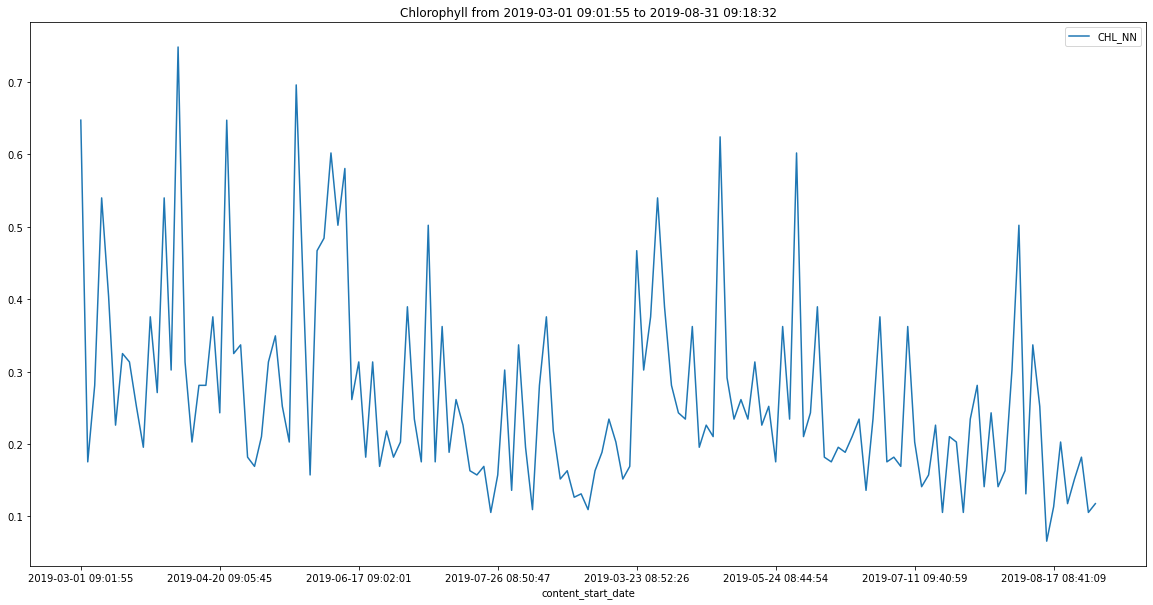

In [31]:

df_Split_2019_trueNN.plot(x='content_start_date', y='CHL_NN', title='Chlorophyll from {} to {}'.format(start_date, end_date), figsize=(20,10))

# Show the plot
plt.show()

In [32]:
df_Split_2019_trueOC4ME["CHL_OC4ME"].describe()

count    118.000000
mean       0.834089
std        0.756645
min        0.010000
25%        0.349387
50%        0.549831
75%        1.114921
max        4.113137
Name: CHL_OC4ME, dtype: float64

In [33]:
df_Split_2019_trueOC4ME["CHL_OC4ME_err"].describe()

count    118.000000
mean       0.040527
std        0.057611
min        0.010000
25%        0.014901
50%        0.020652
75%        0.040882
max        0.362289
Name: CHL_OC4ME_err, dtype: float64

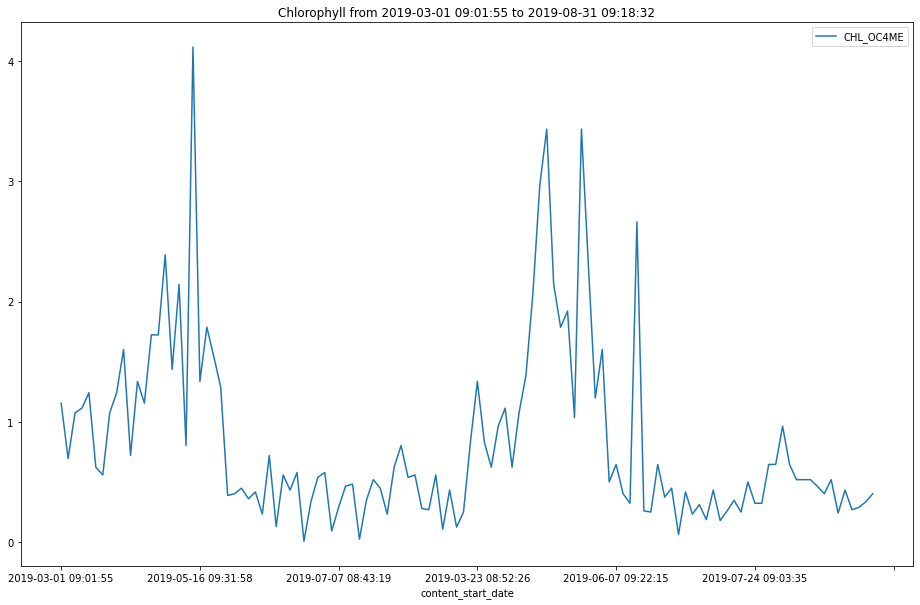

In [34]:
df_Split_2019_trueOC4ME.plot(x='content_start_date', y='CHL_OC4ME', title='Chlorophyll from {} to {}'.format(start_date, end_date), figsize=(16,10))

# Show the plot
plt.show()

In [35]:
df_Split_2019_true.describe()

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,TSM_NN,TSM_NN_err,A865,A865_err,T865,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,1.180000e+02,1.180000e+02,118.000000
mean,0.014074,0.001104,0.014152,0.000947,0.015107,0.000693,0.018971,0.000452,0.015879,0.000391,...,0.970281,0.188917,1.051795,2.511024,0.180542,1.606299,2.614852e+08,4.225475e+06,4.351833e+01,16.381667
std,0.018250,0.000648,0.016791,0.000547,0.012760,0.000385,0.011352,0.000248,0.011068,0.000210,...,0.549324,0.101855,0.564206,0.000000,0.142984,0.000000,7.677872e+07,2.844998e+06,7.135728e-15,0.000000
min,-0.009070,0.000360,-0.009693,0.000323,0.000085,0.000250,0.005872,0.000177,0.003327,0.000177,...,0.202809,0.057004,0.074803,2.511024,0.037795,1.606299,2.000000e+00,3.200000e+01,4.351833e+01,16.381667
25%,0.000754,0.000580,0.001578,0.000488,0.006627,0.000378,0.011621,0.000250,0.009525,0.000232,...,0.466973,0.102770,0.471654,2.511024,0.088189,1.606299,2.684355e+08,2.367536e+06,4.351833e+01,16.381667
50%,0.008170,0.000818,0.008756,0.000690,0.011713,0.000534,0.017307,0.000360,0.014075,0.000342,...,0.913485,0.160249,1.243307,2.511024,0.129134,1.606299,2.684375e+08,4.702208e+06,4.351833e+01,16.381667
75%,0.022182,0.001656,0.020617,0.001399,0.020342,0.000983,0.024325,0.000616,0.020411,0.000507,...,1.424284,0.261410,1.618110,2.511024,0.218898,1.606299,3.019899e+08,5.238840e+06,4.351833e+01,16.381667
max,0.094772,0.002850,0.093838,0.002393,0.091202,0.001679,0.093014,0.001477,0.090689,0.001349,...,2.567136,0.559798,1.706299,2.511024,0.800000,1.606299,3.187712e+08,1.363159e+07,4.351833e+01,16.381667


In [36]:
df_Split_2019_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Columns: 126 entries, Oa01_reflectance to coordinates
dtypes: float64(122), object(4)
memory usage: 116.3+ KB


In [37]:
# oldest date within data
df_Split_2019_true['content_start_date'].min()

'2019-03-01 09:01:55'

In [38]:
# the most recent date within data
df_Split_2019['content_start_date'].max()

'2019-08-31 09:18:32'

In [39]:
# How many unique values of lat and long are in dataset

print("Unique lat values:",df_Split_2019_true.latitude.unique().size)
print("Unique long values:",df_Split_2019_true.longitude.unique().size)

Unique lat values: 117
Unique long values: 117


In [40]:
# dataframe locations on map

import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_Split_2019_true,lat="latitude",lon="longitude",title="Extracted image data Locations",color_continuous_scale=color_scale,zoom=6,height=300,width=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [41]:
df_Split_2019_true

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,T865,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude,in_date,content_start_date,content_end_date,coordinates
0,0.000452,0.002319,0.001276,0.001971,0.008673,0.001386,0.019221,0.000836,0.017481,0.000690,...,0.119685,1.606299,301989890.0,5226528.0,43.518333,16.381667,2019-03-01 00:00:00,2019-03-01 09:01:55,2019-03-01 09:04:55,"(43.518, 16.38104)"
1,0.012500,0.001569,0.011457,0.001331,0.014698,0.000928,0.020338,0.000543,0.017499,0.000452,...,0.075591,1.606299,268435458.0,32.0,43.518333,16.381667,2019-03-04 00:00:00,2019-03-04 09:24:21,2019-03-04 09:27:21,"(43.51714, 16.3822)"
2,0.017994,0.002503,0.014881,0.002136,0.019001,0.001550,0.026875,0.000928,0.024805,0.000781,...,0.069291,1.606299,301989890.0,64.0,43.518333,16.381667,2019-03-12 00:00:00,2019-03-12 09:16:51,2019-03-12 09:19:51,"(43.51805, 16.38328)"
3,0.019861,0.001459,0.018360,0.001221,0.022864,0.000818,0.029676,0.000470,0.027076,0.000378,...,0.044094,1.606299,268437506.0,2097248.0,43.518333,16.381667,2019-03-15 00:00:00,2019-03-15 09:39:18,2019-03-15 09:42:18,"(43.51811, 16.38221)"
4,0.005579,0.000726,0.005872,0.000598,0.010706,0.000415,0.020301,0.000250,0.018580,0.000214,...,0.132283,1.606299,268435458.0,5079040.0,43.518333,16.381667,2019-03-16 00:00:00,2019-03-16 09:13:07,2019-03-16 09:16:07,"(43.51802, 16.38288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.001086,0.002173,0.000745,0.001843,0.006384,0.001276,0.012134,0.000745,0.010028,0.000616,...,0.081890,1.606299,268435458.0,4702240.0,43.518333,16.381667,2019-08-17 00:00:00,2019-08-17 08:41:09,2019-08-17 08:44:09,"(43.51788, 16.3827)"
114,0.001550,0.000433,0.003601,0.000360,0.006696,0.000269,0.010504,0.000195,0.007208,0.000195,...,0.151181,1.606299,268439554.0,1556544.0,43.518333,16.381667,2019-08-19 00:00:00,2019-08-19 09:29:46,2019-08-19 09:32:46,"(43.51879, 16.38205)"
115,0.006879,0.001715,0.008747,0.001440,0.010157,0.000983,0.012537,0.000562,0.008399,0.000470,...,0.069291,1.606299,268435458.0,5472352.0,43.518333,16.381667,2019-08-20 00:00:00,2019-08-20 09:03:35,2019-08-20 09:06:35,"(43.51764, 16.38322)"
116,0.050038,0.000616,0.048885,0.000525,0.036634,0.000397,0.030354,0.000269,0.023103,0.000232,...,0.157480,1.606299,268435458.0,13631588.0,43.518333,16.381667,2019-08-28 00:00:00,2019-08-28 08:56:05,2019-08-28 08:59:05,"(43.51889, 16.38446)"


In [42]:
df_Split_2019_true[['CHL_NN','CHL_OC4ME','coordinates','content_start_date']]

,CHL_NN,CHL_OC4ME,coordinates,content_start_date
0,0.647178,1.156091,"(43.518, 16.38104)",2019-03-01 09:01:55
1,0.175426,0.695856,"(43.51714, 16.3822)",2019-03-04 09:24:21
2,0.281073,1.075217,"(43.51805, 16.38328)",2019-03-12 09:16:51
3,0.403924,1.114921,"(43.51811, 16.38221)",2019-03-15 09:39:18
4,0.226116,1.243049,"(43.51802, 16.38288)",2019-03-16 09:13:07
...,...,...,...,...
113,0.113532,0.434305,"(43.51788, 16.3827)",2019-08-17 08:41:09
114,0.202809,0.271063,"(43.51879, 16.38205)",2019-08-19 09:29:46
115,0.117724,0.291452,"(43.51764, 16.38322)",2019-08-20 09:03:35
116,0.105590,0.336945,"(43.51889, 16.38446)",2019-08-28 08:56:05


## Correlation between bands and CHL_NN

In [43]:
df_Split_2019_true[['Oa01_reflectance','Oa02_reflectance','Oa03_reflectance','Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'Oa07_reflectance', 'Oa08_reflectance', 'Oa09_reflectance', 'Oa10_reflectance', 'Oa11_reflectance', 'Oa12_reflectance', 'Oa16_reflectance', 'Oa17_reflectance', 'Oa21_reflectance','CHL_NN']]

,Oa01_reflectance,Oa02_reflectance,Oa03_reflectance,Oa04_reflectance,Oa05_reflectance,Oa06_reflectance,Oa07_reflectance,Oa08_reflectance,Oa09_reflectance,Oa10_reflectance,Oa11_reflectance,Oa12_reflectance,Oa16_reflectance,Oa17_reflectance,Oa21_reflectance,CHL_NN
0,0.000452,0.001276,0.008673,0.019221,0.017481,0.013800,-0.001453,-0.001764,-0.002277,-0.001453,-0.001178,-0.000006,0.000452,0.000214,0.000726,0.647178
1,0.012500,0.011457,0.014698,0.020338,0.017499,0.011841,0.000378,-0.000098,-0.000098,0.000287,0.000049,0.000269,0.000012,0.000012,0.000635,0.175426
2,0.017994,0.014881,0.019001,0.026875,0.024805,0.018928,0.002466,0.000946,0.001184,0.001605,0.000580,0.000067,0.000763,0.000507,0.001495,0.281073
3,0.019861,0.018360,0.022864,0.029676,0.027076,0.021125,0.004425,0.002521,0.002484,0.002246,0.001605,0.001093,0.000195,-0.000006,0.000763,0.403924
4,0.005579,0.005872,0.010706,0.020301,0.018580,0.015027,0.000250,-0.000885,-0.000848,-0.000610,-0.000922,-0.000244,0.000122,0.000012,0.003253,0.226116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.001086,0.000745,0.006384,0.012134,0.010028,0.005542,-0.003870,-0.003723,-0.003522,-0.003339,-0.001563,0.001550,0.000122,0.000031,0.005744,0.113532
114,0.001550,0.003601,0.006696,0.010504,0.007208,0.003748,-0.001947,-0.001892,-0.002112,-0.001910,-0.001416,0.000177,-0.000098,-0.000006,0.001569,0.202809
115,0.006879,0.008747,0.010157,0.012537,0.008399,0.004645,-0.001178,-0.001361,-0.001251,-0.001434,-0.000354,0.001111,-0.000043,0.000012,0.004297,0.117724
116,0.050038,0.048885,0.036634,0.030354,0.023103,0.014331,0.004480,0.001202,0.000983,0.000763,0.001788,0.004205,-0.000189,0.000031,-0.001050,0.105590


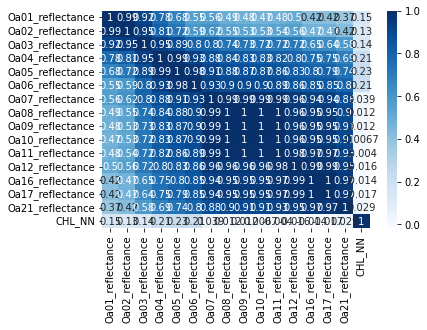

In [44]:
corr_matrix = df_Split_2019_true[['Oa01_reflectance','Oa02_reflectance','Oa03_reflectance','Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'Oa07_reflectance', 'Oa08_reflectance', 'Oa09_reflectance', 'Oa10_reflectance', 'Oa11_reflectance', 'Oa12_reflectance', 'Oa16_reflectance', 'Oa17_reflectance', 'Oa21_reflectance'
, 'CHL_NN']].corr()
sns.heatmap(corr_matrix, annot=True,cmap='Blues')
plt.show()

## Correlation between bands and CHL_OC4ME

In [45]:
df_Split_2019_true[['Oa03_reflectance','Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'CHL_OC4ME']]

,Oa03_reflectance,Oa04_reflectance,Oa05_reflectance,Oa06_reflectance,CHL_OC4ME
0,0.008673,0.019221,0.017481,0.013800,1.156091
1,0.014698,0.020338,0.017499,0.011841,0.695856
2,0.019001,0.026875,0.024805,0.018928,1.075217
3,0.022864,0.029676,0.027076,0.021125,1.114921
4,0.010706,0.020301,0.018580,0.015027,1.243049
...,...,...,...,...,...
113,0.006384,0.012134,0.010028,0.005542,0.434305
114,0.006696,0.010504,0.007208,0.003748,0.271063
115,0.010157,0.012537,0.008399,0.004645,0.291452
116,0.036634,0.030354,0.023103,0.014331,0.336945


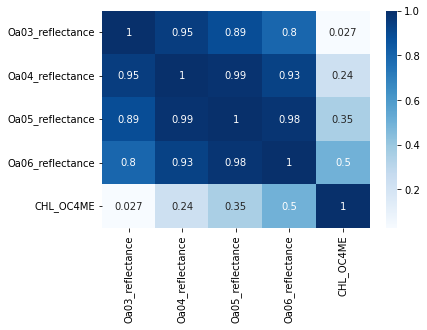

In [46]:
corr_matrix = df_Split_2019_true[['Oa03_reflectance','Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'CHL_OC4ME']].corr()
sns.heatmap(corr_matrix, annot=True,cmap='Blues')
plt.show()

In [47]:
razlika = []
for i in range(len(df_Split_2019_true)):
    minus = abs(df_Split_2019_true['CHL_NN'][i]-df_Split_2019_true['CHL_OC4ME'][i])
    razlika.append(minus)
razlika

[0.5089134550384301,
 0.5204302725801166,
 0.7941439877384282,
 0.7109973976795103,
 1.0169331147099334,
 0.3107567369640528,
 0.307697056269523,
 0.6995497504968989,
 0.9719854201323703,
 1.0623654418603148,
 0.41933786260830386,
 0.5883504080308151,
 0.8427172425610799,
 1.5199341686181813,
 1.4416700350095608,
 2.106478647043277,
 1.0614108036476742,
 1.8045084952350778,
 0.6225695021271166,
 3.902839654117832,
 1.0231730081531065,
 1.4369707118891204,
 1.29306923043206,
 1.0861417076346433,
 0.3063172772825758,
 0.01491553986856542,
 0.03387337416429581,
 0.23961547734549477,
 0.08325761301816098,
 0.34600426981421095,
 0.4081781059242878,
 0.05065081113742145,
 0.24642417115418347,
 0.2651264407925262,
 0.3624063084516091,
 0.1719041113521037,
 0.13413631269982382,
 0.3053974838321242,
 0.40504344356633626,
 0.0807201119175399,
 0.07083704822878578,
 0.2408568361146152,
 0.32106199315456346,
 0.1307247600490391,
 0.18020827341193496,
 0.4150476584811076,
 0.2929988066538152,
 0.06

In [48]:
df_Split_2019_true['in_date'] = pd.to_datetime(df_Split_2019_true['in_date'])
df_Split_2019_true['in_date']

0     2019-03-01
1     2019-03-04
2     2019-03-12
3     2019-03-15
4     2019-03-16
         ...    
113   2019-08-17
114   2019-08-19
115   2019-08-20
116   2019-08-28
117   2019-08-31
Name: in_date, Length: 118, dtype: datetime64[ns]

In [49]:
df_Split_2019_true['rounded_time'] = df_Split_2019_true['in_date'].dt.floor('D')
df_Split_2019_true

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude,in_date,content_start_date,content_end_date,coordinates,rounded_time
0,0.000452,0.002319,0.001276,0.001971,0.008673,0.001386,0.019221,0.000836,0.017481,0.000690,...,1.606299,301989890.0,5226528.0,43.518333,16.381667,2019-03-01,2019-03-01 09:01:55,2019-03-01 09:04:55,"(43.518, 16.38104)",2019-03-01
1,0.012500,0.001569,0.011457,0.001331,0.014698,0.000928,0.020338,0.000543,0.017499,0.000452,...,1.606299,268435458.0,32.0,43.518333,16.381667,2019-03-04,2019-03-04 09:24:21,2019-03-04 09:27:21,"(43.51714, 16.3822)",2019-03-04
2,0.017994,0.002503,0.014881,0.002136,0.019001,0.001550,0.026875,0.000928,0.024805,0.000781,...,1.606299,301989890.0,64.0,43.518333,16.381667,2019-03-12,2019-03-12 09:16:51,2019-03-12 09:19:51,"(43.51805, 16.38328)",2019-03-12
3,0.019861,0.001459,0.018360,0.001221,0.022864,0.000818,0.029676,0.000470,0.027076,0.000378,...,1.606299,268437506.0,2097248.0,43.518333,16.381667,2019-03-15,2019-03-15 09:39:18,2019-03-15 09:42:18,"(43.51811, 16.38221)",2019-03-15
4,0.005579,0.000726,0.005872,0.000598,0.010706,0.000415,0.020301,0.000250,0.018580,0.000214,...,1.606299,268435458.0,5079040.0,43.518333,16.381667,2019-03-16,2019-03-16 09:13:07,2019-03-16 09:16:07,"(43.51802, 16.38288)",2019-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.001086,0.002173,0.000745,0.001843,0.006384,0.001276,0.012134,0.000745,0.010028,0.000616,...,1.606299,268435458.0,4702240.0,43.518333,16.381667,2019-08-17,2019-08-17 08:41:09,2019-08-17 08:44:09,"(43.51788, 16.3827)",2019-08-17
114,0.001550,0.000433,0.003601,0.000360,0.006696,0.000269,0.010504,0.000195,0.007208,0.000195,...,1.606299,268439554.0,1556544.0,43.518333,16.381667,2019-08-19,2019-08-19 09:29:46,2019-08-19 09:32:46,"(43.51879, 16.38205)",2019-08-19
115,0.006879,0.001715,0.008747,0.001440,0.010157,0.000983,0.012537,0.000562,0.008399,0.000470,...,1.606299,268435458.0,5472352.0,43.518333,16.381667,2019-08-20,2019-08-20 09:03:35,2019-08-20 09:06:35,"(43.51764, 16.38322)",2019-08-20
116,0.050038,0.000616,0.048885,0.000525,0.036634,0.000397,0.030354,0.000269,0.023103,0.000232,...,1.606299,268435458.0,13631588.0,43.518333,16.381667,2019-08-28,2019-08-28 08:56:05,2019-08-28 08:59:05,"(43.51889, 16.38446)",2019-08-28


In [50]:
tabl = []
for i in range(len(df_Split_2019_true)):
    for j in range(len(df_Split_2019_true)):
        if df_Split_2019_true['in_date'][i]==df_Split_2019_true['in_date'][j]:
            tabl.append(abs(df_Split_2019_true['CHL_NN'][i]-df_Split_2019_true['CHL_NN'][1]))
    break
tabl

[0.4717515947549523]

In [51]:
tabl1 = []
for i in range(len(df_Split_2019_true)):
    for j in range(len(df_Split_2019_true)):
        if df_Split_2019_true['in_date'][i]==df_Split_2019_true['in_date'][j]:
            tabl1.append(abs(df_Split_2019_true['CHL_OC4ME'][0]-df_Split_2019_true['CHL_OC4ME'][1]))
    break
tabl

[0.4717515947549523]

In [52]:
df_Split_2019_true

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude,in_date,content_start_date,content_end_date,coordinates,rounded_time
0,0.000452,0.002319,0.001276,0.001971,0.008673,0.001386,0.019221,0.000836,0.017481,0.000690,...,1.606299,301989890.0,5226528.0,43.518333,16.381667,2019-03-01,2019-03-01 09:01:55,2019-03-01 09:04:55,"(43.518, 16.38104)",2019-03-01
1,0.012500,0.001569,0.011457,0.001331,0.014698,0.000928,0.020338,0.000543,0.017499,0.000452,...,1.606299,268435458.0,32.0,43.518333,16.381667,2019-03-04,2019-03-04 09:24:21,2019-03-04 09:27:21,"(43.51714, 16.3822)",2019-03-04
2,0.017994,0.002503,0.014881,0.002136,0.019001,0.001550,0.026875,0.000928,0.024805,0.000781,...,1.606299,301989890.0,64.0,43.518333,16.381667,2019-03-12,2019-03-12 09:16:51,2019-03-12 09:19:51,"(43.51805, 16.38328)",2019-03-12
3,0.019861,0.001459,0.018360,0.001221,0.022864,0.000818,0.029676,0.000470,0.027076,0.000378,...,1.606299,268437506.0,2097248.0,43.518333,16.381667,2019-03-15,2019-03-15 09:39:18,2019-03-15 09:42:18,"(43.51811, 16.38221)",2019-03-15
4,0.005579,0.000726,0.005872,0.000598,0.010706,0.000415,0.020301,0.000250,0.018580,0.000214,...,1.606299,268435458.0,5079040.0,43.518333,16.381667,2019-03-16,2019-03-16 09:13:07,2019-03-16 09:16:07,"(43.51802, 16.38288)",2019-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.001086,0.002173,0.000745,0.001843,0.006384,0.001276,0.012134,0.000745,0.010028,0.000616,...,1.606299,268435458.0,4702240.0,43.518333,16.381667,2019-08-17,2019-08-17 08:41:09,2019-08-17 08:44:09,"(43.51788, 16.3827)",2019-08-17
114,0.001550,0.000433,0.003601,0.000360,0.006696,0.000269,0.010504,0.000195,0.007208,0.000195,...,1.606299,268439554.0,1556544.0,43.518333,16.381667,2019-08-19,2019-08-19 09:29:46,2019-08-19 09:32:46,"(43.51879, 16.38205)",2019-08-19
115,0.006879,0.001715,0.008747,0.001440,0.010157,0.000983,0.012537,0.000562,0.008399,0.000470,...,1.606299,268435458.0,5472352.0,43.518333,16.381667,2019-08-20,2019-08-20 09:03:35,2019-08-20 09:06:35,"(43.51764, 16.38322)",2019-08-20
116,0.050038,0.000616,0.048885,0.000525,0.036634,0.000397,0.030354,0.000269,0.023103,0.000232,...,1.606299,268435458.0,13631588.0,43.518333,16.381667,2019-08-28,2019-08-28 08:56:05,2019-08-28 08:59:05,"(43.51889, 16.38446)",2019-08-28


# Connecting data and in-situ

In [53]:
in_situ_Split_2019

,img_type,date,lat,long,repl_img_type,I-S(mg/m3),coordinates
318,s3olci,2019-03-04 12:35:00,43.503417,16.204961,NaN,0.30,"(43.50342, 16.20496)"
147,s3olci,2019-04-14 19:35:00,43.487667,15.721500,NaN,0.20,"(43.48767, 15.7215)"
135,s3olci,2019-04-15 08:10:00,43.518333,16.381667,NaN,0.81,"(43.51833, 16.38167)"
136,s3olci,2019-07-22 08:39:00,43.518333,16.381667,NaN,0.13,"(43.51833, 16.38167)"
255,s3olci,2019-07-27 11:02:00,43.503183,16.433800,NaN,0.50,"(43.50318, 16.4338)"
319,s3olci,2019-07-28 16:08:00,43.503417,16.204961,NaN,0.74,"(43.50342, 16.20496)"
254,s3olci,2019-08-04 11:50:00,43.503183,16.433800,NaN,0.34,"(43.50318, 16.4338)"
635,s3olci,2019-03-19 07:35:00,43.518333,16.381667,NaN,1.03,"(43.51833, 16.38167)"
645,s3olci,2019-03-19 08:40:00,43.530000,16.453333,NaN,1.05,"(43.53, 16.45333)"
611,s3olci,2019-03-19 14:30:00,43.426719,16.393519,NaN,0.35,"(43.42672, 16.39352)"


In [54]:
in_situ_Split_2019['rounded_time'] = in_situ_Split_2019['date'].dt.floor('D')
in_situ_Split_2019

,img_type,date,lat,long,repl_img_type,I-S(mg/m3),coordinates,rounded_time
318,s3olci,2019-03-04 12:35:00,43.503417,16.204961,NaN,0.30,"(43.50342, 16.20496)",2019-03-04
147,s3olci,2019-04-14 19:35:00,43.487667,15.721500,NaN,0.20,"(43.48767, 15.7215)",2019-04-14
135,s3olci,2019-04-15 08:10:00,43.518333,16.381667,NaN,0.81,"(43.51833, 16.38167)",2019-04-15
136,s3olci,2019-07-22 08:39:00,43.518333,16.381667,NaN,0.13,"(43.51833, 16.38167)",2019-07-22
255,s3olci,2019-07-27 11:02:00,43.503183,16.433800,NaN,0.50,"(43.50318, 16.4338)",2019-07-27
319,s3olci,2019-07-28 16:08:00,43.503417,16.204961,NaN,0.74,"(43.50342, 16.20496)",2019-07-28
254,s3olci,2019-08-04 11:50:00,43.503183,16.433800,NaN,0.34,"(43.50318, 16.4338)",2019-08-04
635,s3olci,2019-03-19 07:35:00,43.518333,16.381667,NaN,1.03,"(43.51833, 16.38167)",2019-03-19
645,s3olci,2019-03-19 08:40:00,43.530000,16.453333,NaN,1.05,"(43.53, 16.45333)",2019-03-19
611,s3olci,2019-03-19 14:30:00,43.426719,16.393519,NaN,0.35,"(43.42672, 16.39352)",2019-03-19


In [55]:
df_Split_2019_trueNN['in_date'] = pd.to_datetime(df_Split_2019_trueNN['in_date'])

In [56]:
df_Split_2019_trueOC4ME['in_date'] = pd.to_datetime(df_Split_2019_trueOC4ME['in_date'])

In [57]:
df_Split_2019_trueNN['rounded_time'] = df_Split_2019_trueNN['in_date'].dt.floor('D')

In [58]:
df_Split_2019_trueOC4ME['rounded_time'] = df_Split_2019_trueOC4ME['in_date'].dt.floor('D')

In [59]:
#creating df in which we put in_situ values that match data from pictures with latitute, longitude and date
df = pd.DataFrame()

for i in range(len(df_Split_2019_true['content_start_date'])):
    for j in range(len(in_situ_Split_2019)):
        if (abs(df_Split_2019_true['latitude'].values[i] - in_situ_Split_2019['lat'].values[j]) < 0.02) and (abs(df_Split_2019_true['longitude'].values[i] - in_situ_Split_2019['long'].values[j]) < 0.1):
            if df_Split_2019_true['rounded_time'].values[i] == in_situ_Split_2019['rounded_time'].values[j]:
                 df = df.append(in_situ_Split_2019.iloc[j])

df.reset_index(drop=True, inplace=True)
df

,I-S(mg/m3),coordinates,date,img_type,lat,long,repl_img_type,rounded_time
0,1.03,"(43.51833, 16.38167)",2019-03-19 07:35:00,s3olci,43.518333,16.381667,NaN,2019-03-19
1,1.05,"(43.53, 16.45333)",2019-03-19 08:40:00,s3olci,43.530000,16.453333,NaN,2019-03-19
2,0.81,"(43.51833, 16.38167)",2019-04-15 08:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15
3,0.81,"(43.51833, 16.38167)",2019-04-15 06:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15
4,1.14,"(43.53, 16.45333)",2019-04-15 11:20:00,s3olci,43.530000,16.453333,NaN,2019-04-15
5,0.43,"(43.51833, 16.38167)",2019-06-10 06:10:00,s3olci,43.518333,16.381667,NaN,2019-06-10
6,0.86,"(43.53, 16.45333)",2019-06-10 08:05:00,s3olci,43.530000,16.453333,NaN,2019-06-10
7,0.13,"(43.51833, 16.38167)",2019-07-22 08:39:00,s3olci,43.518333,16.381667,NaN,2019-07-22
8,0.13,"(43.51833, 16.38167)",2019-07-22 06:00:00,s3olci,43.518333,16.381667,NaN,2019-07-22
9,0.48,"(43.53, 16.45333)",2019-07-22 09:35:00,s3olci,43.530000,16.453333,NaN,2019-07-22


In [60]:
dfNN = pd.DataFrame()

for i in range(len(df_Split_2019_trueNN['content_start_date'])):
    for j in range(len(in_situ_Split_2019)):
        if (abs(df_Split_2019_trueNN['latitude'].values[i] - in_situ_Split_2019['lat'].values[j]) < 0.02) and (abs(df_Split_2019_trueNN['longitude'].values[i] - in_situ_Split_2019['long'].values[j]) < 0.1):
            if df_Split_2019_trueNN['rounded_time'].values[i] == in_situ_Split_2019['rounded_time'].values[j]:
                 dfNN = dfNN.append(in_situ_Split_2019.iloc[j])

dfNN.reset_index(drop=True, inplace=True)
dfNN

,I-S(mg/m3),coordinates,date,img_type,lat,long,repl_img_type,rounded_time
0,1.03,"(43.51833, 16.38167)",2019-03-19 07:35:00,s3olci,43.518333,16.381667,NaN,2019-03-19
1,1.05,"(43.53, 16.45333)",2019-03-19 08:40:00,s3olci,43.530000,16.453333,NaN,2019-03-19
2,0.81,"(43.51833, 16.38167)",2019-04-15 08:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15
3,0.81,"(43.51833, 16.38167)",2019-04-15 06:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15
4,1.14,"(43.53, 16.45333)",2019-04-15 11:20:00,s3olci,43.530000,16.453333,NaN,2019-04-15
5,0.43,"(43.51833, 16.38167)",2019-06-10 06:10:00,s3olci,43.518333,16.381667,NaN,2019-06-10
6,0.86,"(43.53, 16.45333)",2019-06-10 08:05:00,s3olci,43.530000,16.453333,NaN,2019-06-10
7,0.13,"(43.51833, 16.38167)",2019-07-22 08:39:00,s3olci,43.518333,16.381667,NaN,2019-07-22
8,0.13,"(43.51833, 16.38167)",2019-07-22 06:00:00,s3olci,43.518333,16.381667,NaN,2019-07-22
9,0.48,"(43.53, 16.45333)",2019-07-22 09:35:00,s3olci,43.530000,16.453333,NaN,2019-07-22


In [61]:
dfOC4ME = pd.DataFrame()

for i in range(len(df_Split_2019_trueOC4ME['content_start_date'])):
    for j in range(len(in_situ_Split_2019)):
        if (abs(df_Split_2019_trueOC4ME['latitude'].values[i] - in_situ_Split_2019['lat'].values[j]) < 0.02) and (abs(df_Split_2019_trueOC4ME['longitude'].values[i] - in_situ_Split_2019['long'].values[j]) < 0.1):
            if df_Split_2019_trueOC4ME['rounded_time'].values[i] == in_situ_Split_2019['rounded_time'].values[j]:
                 dfOC4ME = dfOC4ME.append(in_situ_Split_2019.iloc[j])

dfOC4ME.reset_index(drop=True, inplace=True)
dfOC4ME

,I-S(mg/m3),coordinates,date,img_type,lat,long,repl_img_type,rounded_time
0,1.03,"(43.51833, 16.38167)",2019-03-19 07:35:00,s3olci,43.518333,16.381667,NaN,2019-03-19
1,1.05,"(43.53, 16.45333)",2019-03-19 08:40:00,s3olci,43.530000,16.453333,NaN,2019-03-19
2,0.81,"(43.51833, 16.38167)",2019-04-15 08:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15
3,0.81,"(43.51833, 16.38167)",2019-04-15 06:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15
4,1.14,"(43.53, 16.45333)",2019-04-15 11:20:00,s3olci,43.530000,16.453333,NaN,2019-04-15
5,0.43,"(43.51833, 16.38167)",2019-06-10 06:10:00,s3olci,43.518333,16.381667,NaN,2019-06-10
6,0.86,"(43.53, 16.45333)",2019-06-10 08:05:00,s3olci,43.530000,16.453333,NaN,2019-06-10
7,0.13,"(43.51833, 16.38167)",2019-07-22 08:39:00,s3olci,43.518333,16.381667,NaN,2019-07-22
8,0.13,"(43.51833, 16.38167)",2019-07-22 06:00:00,s3olci,43.518333,16.381667,NaN,2019-07-22
9,0.48,"(43.53, 16.45333)",2019-07-22 09:35:00,s3olci,43.530000,16.453333,NaN,2019-07-22


In [62]:
df_Split_2019_true

,Oa01_reflectance,Oa01_reflectance_err,Oa02_reflectance,Oa02_reflectance_err,Oa03_reflectance,Oa03_reflectance_err,Oa04_reflectance,Oa04_reflectance_err,Oa05_reflectance,Oa05_reflectance_err,...,T865_err,WQSF_lsb,WQSF_msb,in_latitude,in_longitude,in_date,content_start_date,content_end_date,coordinates,rounded_time
0,0.000452,0.002319,0.001276,0.001971,0.008673,0.001386,0.019221,0.000836,0.017481,0.000690,...,1.606299,301989890.0,5226528.0,43.518333,16.381667,2019-03-01,2019-03-01 09:01:55,2019-03-01 09:04:55,"(43.518, 16.38104)",2019-03-01
1,0.012500,0.001569,0.011457,0.001331,0.014698,0.000928,0.020338,0.000543,0.017499,0.000452,...,1.606299,268435458.0,32.0,43.518333,16.381667,2019-03-04,2019-03-04 09:24:21,2019-03-04 09:27:21,"(43.51714, 16.3822)",2019-03-04
2,0.017994,0.002503,0.014881,0.002136,0.019001,0.001550,0.026875,0.000928,0.024805,0.000781,...,1.606299,301989890.0,64.0,43.518333,16.381667,2019-03-12,2019-03-12 09:16:51,2019-03-12 09:19:51,"(43.51805, 16.38328)",2019-03-12
3,0.019861,0.001459,0.018360,0.001221,0.022864,0.000818,0.029676,0.000470,0.027076,0.000378,...,1.606299,268437506.0,2097248.0,43.518333,16.381667,2019-03-15,2019-03-15 09:39:18,2019-03-15 09:42:18,"(43.51811, 16.38221)",2019-03-15
4,0.005579,0.000726,0.005872,0.000598,0.010706,0.000415,0.020301,0.000250,0.018580,0.000214,...,1.606299,268435458.0,5079040.0,43.518333,16.381667,2019-03-16,2019-03-16 09:13:07,2019-03-16 09:16:07,"(43.51802, 16.38288)",2019-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.001086,0.002173,0.000745,0.001843,0.006384,0.001276,0.012134,0.000745,0.010028,0.000616,...,1.606299,268435458.0,4702240.0,43.518333,16.381667,2019-08-17,2019-08-17 08:41:09,2019-08-17 08:44:09,"(43.51788, 16.3827)",2019-08-17
114,0.001550,0.000433,0.003601,0.000360,0.006696,0.000269,0.010504,0.000195,0.007208,0.000195,...,1.606299,268439554.0,1556544.0,43.518333,16.381667,2019-08-19,2019-08-19 09:29:46,2019-08-19 09:32:46,"(43.51879, 16.38205)",2019-08-19
115,0.006879,0.001715,0.008747,0.001440,0.010157,0.000983,0.012537,0.000562,0.008399,0.000470,...,1.606299,268435458.0,5472352.0,43.518333,16.381667,2019-08-20,2019-08-20 09:03:35,2019-08-20 09:06:35,"(43.51764, 16.38322)",2019-08-20
116,0.050038,0.000616,0.048885,0.000525,0.036634,0.000397,0.030354,0.000269,0.023103,0.000232,...,1.606299,268435458.0,13631588.0,43.518333,16.381667,2019-08-28,2019-08-28 08:56:05,2019-08-28 08:59:05,"(43.51889, 16.38446)",2019-08-28


In [63]:
#connecting existing v alues of df with bands from df_Split_2019_true
for i in range(len(df_Split_2019_true['content_start_date'])):
    for j in range(len(df)):
        if df['rounded_time'].values[j] == df_Split_2019_true['rounded_time'].values[i]:
            df.loc[j, ['Oa01_reflectance', 'Oa02_reflectance', 'Oa03_reflectance', 'Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'Oa07_reflectance', 'Oa08_reflectance', 'Oa09_reflectance', 'Oa10_reflectance', 'Oa11_reflectance', 'Oa12_reflectance', 'Oa16_reflectance', 'Oa17_reflectance', 'Oa21_reflectance', 'CHL_NN', 'CHL_OC4ME', 'CHL_NN_err', 'CHL_OC4ME_err']] = df_Split_2019_true.loc[i, ['Oa01_reflectance', 'Oa02_reflectance', 'Oa03_reflectance', 'Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'Oa07_reflectance', 'Oa08_reflectance', 'Oa09_reflectance', 'Oa10_reflectance', 'Oa11_reflectance', 'Oa12_reflectance', 'Oa16_reflectance', 'Oa17_reflectance', 'Oa21_reflectance', 'CHL_NN', 'CHL_OC4ME', 'CHL_NN_err', 'CHL_OC4ME_err']]

df

,I-S(mg/m3),coordinates,date,img_type,lat,long,repl_img_type,rounded_time,Oa01_reflectance,Oa02_reflectance,...,Oa10_reflectance,Oa11_reflectance,Oa12_reflectance,Oa16_reflectance,Oa17_reflectance,Oa21_reflectance,CHL_NN,CHL_OC4ME,CHL_NN_err,CHL_OC4ME_err
0,1.03,"(43.51833, 16.38167)",2019-03-19 07:35:00,s3olci,43.518333,16.381667,NaN,2019-03-19,0.058809,0.046559,...,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479,0.313374,0.624131,0.084944,0.018523
1,1.05,"(43.53, 16.45333)",2019-03-19 08:40:00,s3olci,43.530000,16.453333,NaN,2019-03-19,0.058809,0.046559,...,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479,0.313374,0.624131,0.084944,0.018523
2,0.81,"(43.51833, 16.38167)",2019-04-15 08:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
3,0.81,"(43.51833, 16.38167)",2019-04-15 06:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
4,1.14,"(43.53, 16.45333)",2019-04-15 11:20:00,s3olci,43.530000,16.453333,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
5,0.43,"(43.51833, 16.38167)",2019-06-10 06:10:00,s3olci,43.518333,16.381667,NaN,2019-06-10,0.039308,0.036177,...,-0.006470,-0.003632,0.002557,-0.000116,0.000031,0.002979,0.601904,0.362289,0.141126,0.013859
6,0.86,"(43.53, 16.45333)",2019-06-10 08:05:00,s3olci,43.530000,16.453333,NaN,2019-06-10,0.039308,0.036177,...,-0.006470,-0.003632,0.002557,-0.000116,0.000031,0.002979,0.601904,0.362289,0.141126,0.013859
7,0.13,"(43.51833, 16.38167)",2019-07-22 08:39:00,s3olci,43.518333,16.381667,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000
8,0.13,"(43.51833, 16.38167)",2019-07-22 06:00:00,s3olci,43.518333,16.381667,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000
9,0.48,"(43.53, 16.45333)",2019-07-22 09:35:00,s3olci,43.530000,16.453333,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000


In [64]:
df_Split_2019_filtered = df

In [65]:
df_Split_2019_filtered.reset_index(drop=True, inplace=True)
df_Split_2019_filtered

,I-S(mg/m3),coordinates,date,img_type,lat,long,repl_img_type,rounded_time,Oa01_reflectance,Oa02_reflectance,...,Oa10_reflectance,Oa11_reflectance,Oa12_reflectance,Oa16_reflectance,Oa17_reflectance,Oa21_reflectance,CHL_NN,CHL_OC4ME,CHL_NN_err,CHL_OC4ME_err
0,1.03,"(43.51833, 16.38167)",2019-03-19 07:35:00,s3olci,43.518333,16.381667,NaN,2019-03-19,0.058809,0.046559,...,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479,0.313374,0.624131,0.084944,0.018523
1,1.05,"(43.53, 16.45333)",2019-03-19 08:40:00,s3olci,43.530000,16.453333,NaN,2019-03-19,0.058809,0.046559,...,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479,0.313374,0.624131,0.084944,0.018523
2,0.81,"(43.51833, 16.38167)",2019-04-15 08:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
3,0.81,"(43.51833, 16.38167)",2019-04-15 06:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
4,1.14,"(43.53, 16.45333)",2019-04-15 11:20:00,s3olci,43.530000,16.453333,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
5,0.43,"(43.51833, 16.38167)",2019-06-10 06:10:00,s3olci,43.518333,16.381667,NaN,2019-06-10,0.039308,0.036177,...,-0.006470,-0.003632,0.002557,-0.000116,0.000031,0.002979,0.601904,0.362289,0.141126,0.013859
6,0.86,"(43.53, 16.45333)",2019-06-10 08:05:00,s3olci,43.530000,16.453333,NaN,2019-06-10,0.039308,0.036177,...,-0.006470,-0.003632,0.002557,-0.000116,0.000031,0.002979,0.601904,0.362289,0.141126,0.013859
7,0.13,"(43.51833, 16.38167)",2019-07-22 08:39:00,s3olci,43.518333,16.381667,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000
8,0.13,"(43.51833, 16.38167)",2019-07-22 06:00:00,s3olci,43.518333,16.381667,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000
9,0.48,"(43.53, 16.45333)",2019-07-22 09:35:00,s3olci,43.530000,16.453333,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000


In [66]:
# dataframe locations on map

import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_Split_2019_filtered,lat="lat",lon="long",title="Extracted image data Locations",color_continuous_scale=color_scale,zoom=6,height=300,width=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Correlation of bands with in-situ

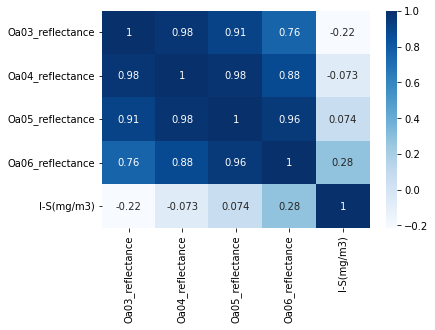

In [67]:
corr_matrix = df_Split_2019_filtered[['Oa03_reflectance','Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'I-S(mg/m3)']].corr()
sns.heatmap(corr_matrix, annot=True,cmap='Blues')
plt.show()

In [68]:
df_Split_2019_filtered['I-S(mg/m3)'].describe()

count    18.000000
mean      0.635000
std       0.349643
min       0.090000
25%       0.385000
50%       0.655000
75%       0.847500
max       1.140000
Name: I-S(mg/m3), dtype: float64

2019-03-19 00:00:00
2019-08-20 00:00:00


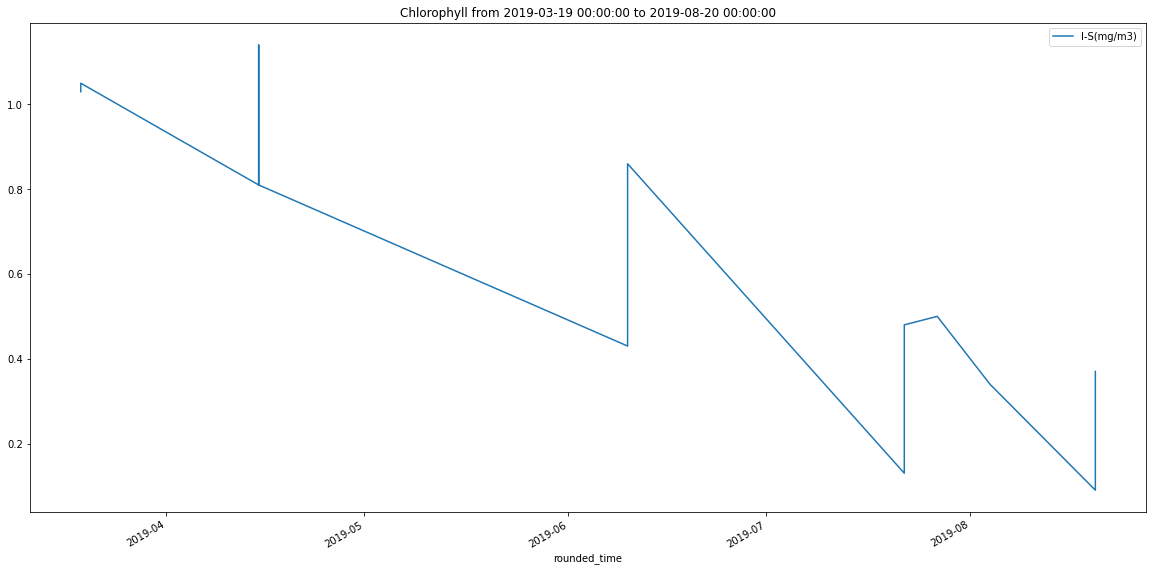

In [69]:
 # oldest date within data

start_date = df_Split_2019_filtered['rounded_time'].min()
print(start_date)

# recent date within data

end_date = df_Split_2019_filtered['rounded_time'].max()
print(end_date)

df_Split_2019_filtered.plot(x='rounded_time', y='I-S(mg/m3)', title='Chlorophyll from {} to {}'.format(start_date, end_date), figsize=(20,10))

# Show the plot
plt.show()

In [70]:
df_Split_2019_filtered['CHL_NN'].describe()

count    18.000000
mean      0.263574
std       0.134557
min       0.117724
25%       0.185501
50%       0.243123
75%       0.243123
max       0.601904
Name: CHL_NN, dtype: float64

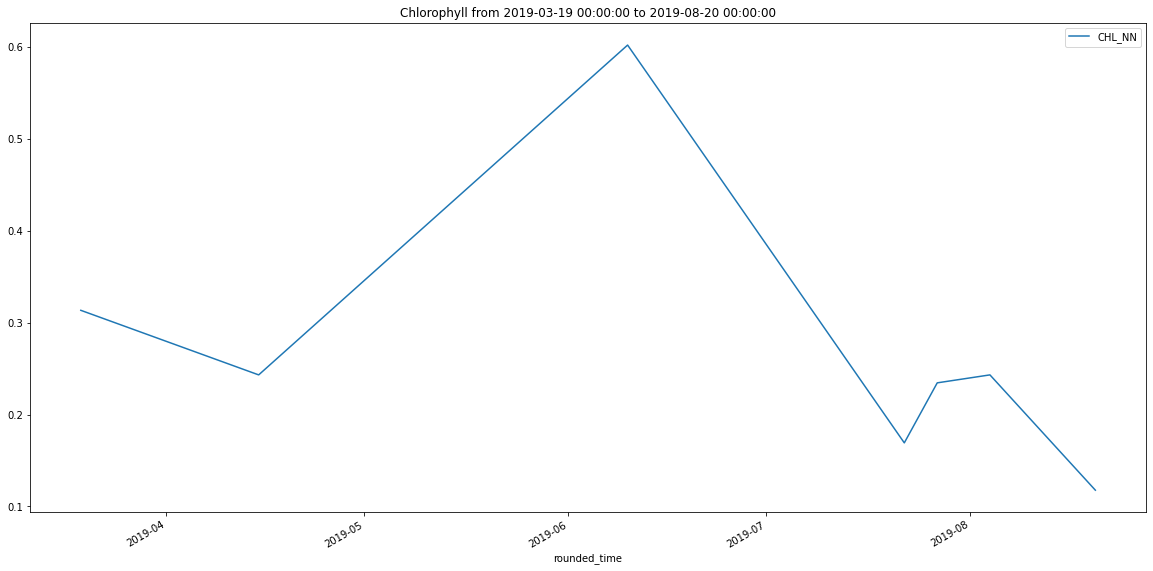

In [71]:
df_Split_2019_filtered.plot(x='rounded_time', y='CHL_NN', title='Chlorophyll from {} to {}'.format(start_date, end_date), figsize=(20,10))

# Show the plot
plt.show()

In [72]:
df_Split_2019_filtered['CHL_OC4ME'].describe()

count    18.000000
mean      0.648305
std       0.350636
min       0.291452
25%       0.349387
50%       0.493210
75%       1.075217
max       1.075217
Name: CHL_OC4ME, dtype: float64

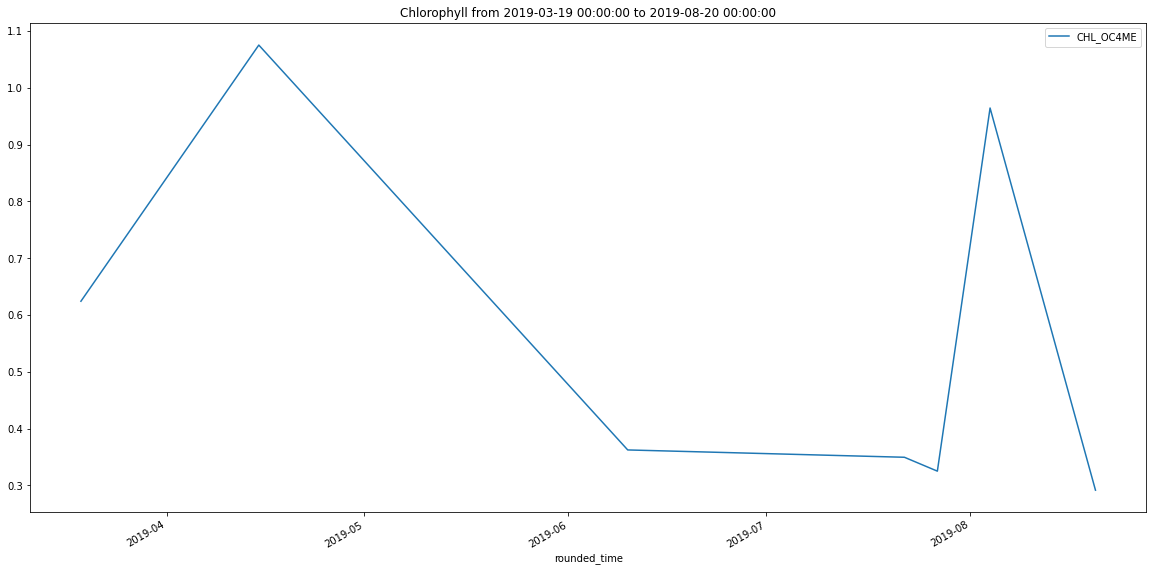

In [73]:
df_Split_2019_filtered.plot(x='rounded_time', y='CHL_OC4ME', title='Chlorophyll from {} to {}'.format(start_date, end_date), figsize=(20,10))

# Show the plot
plt.show()

Looking for difference beetween CHL_NN and in-situ

In [74]:
razlika = []
for i in range(len(df_Split_2019_filtered)):
    razlika.append(abs(df_Split_2019_filtered['CHL_NN'][i] - df_Split_2019_filtered['I-S(mg/m3)'][i]))

razlika

[0.7166259816356152,
 0.7366259816356152,
 0.5668765966901124,
 0.5668765966901124,
 0.8968765966901122,
 0.17190444759293927,
 0.2580955524070607,
 0.039178999437727735,
 0.039178999437727735,
 0.31082100056227224,
 0.5668765966901124,
 0.5668765966901124,
 0.8968765966901122,
 0.26553461511579235,
 0.26553461511579235,
 0.09687659669011234,
 0.027724305686315925,
 0.2522756943136841]

Looking for difference beetween CHL_OC4ME and in-situ

In [75]:
razlika = []
for i in range(len(df_Split_2019_filtered)):
    razlika.append(abs(df_Split_2019_filtered['CHL_OC4ME'][i] - df_Split_2019_filtered['I-S(mg/m3)'][i]))

razlika

[0.4058692446715624,
 0.4258692446715624,
 0.2652168344534187,
 0.2652168344534187,
 0.06478316554658115,
 0.0677110297525555,
 0.4977110297525555,
 0.2193872728496627,
 0.2193872728496627,
 0.13061272715033728,
 0.2652168344534187,
 0.2652168344534187,
 0.06478316554658115,
 0.17505413265471687,
 0.17505413265471687,
 0.6243883627400615,
 0.20145192201865872,
 0.07854807798134128]

In [76]:
df_Split_2019_filtered

,I-S(mg/m3),coordinates,date,img_type,lat,long,repl_img_type,rounded_time,Oa01_reflectance,Oa02_reflectance,...,Oa10_reflectance,Oa11_reflectance,Oa12_reflectance,Oa16_reflectance,Oa17_reflectance,Oa21_reflectance,CHL_NN,CHL_OC4ME,CHL_NN_err,CHL_OC4ME_err
0,1.03,"(43.51833, 16.38167)",2019-03-19 07:35:00,s3olci,43.518333,16.381667,NaN,2019-03-19,0.058809,0.046559,...,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479,0.313374,0.624131,0.084944,0.018523
1,1.05,"(43.53, 16.45333)",2019-03-19 08:40:00,s3olci,43.530000,16.453333,NaN,2019-03-19,0.058809,0.046559,...,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479,0.313374,0.624131,0.084944,0.018523
2,0.81,"(43.51833, 16.38167)",2019-04-15 08:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
3,0.81,"(43.51833, 16.38167)",2019-04-15 06:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
4,1.14,"(43.53, 16.45333)",2019-04-15 11:20:00,s3olci,43.530000,16.453333,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
5,0.43,"(43.51833, 16.38167)",2019-06-10 06:10:00,s3olci,43.518333,16.381667,NaN,2019-06-10,0.039308,0.036177,...,-0.006470,-0.003632,0.002557,-0.000116,0.000031,0.002979,0.601904,0.362289,0.141126,0.013859
6,0.86,"(43.53, 16.45333)",2019-06-10 08:05:00,s3olci,43.530000,16.453333,NaN,2019-06-10,0.039308,0.036177,...,-0.006470,-0.003632,0.002557,-0.000116,0.000031,0.002979,0.601904,0.362289,0.141126,0.013859
7,0.13,"(43.51833, 16.38167)",2019-07-22 08:39:00,s3olci,43.518333,16.381667,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000
8,0.13,"(43.51833, 16.38167)",2019-07-22 06:00:00,s3olci,43.518333,16.381667,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000
9,0.48,"(43.53, 16.45333)",2019-07-22 09:35:00,s3olci,43.530000,16.453333,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000


# Changes of bands through time

In [77]:
# Convert 'date' column to datetime type
df_Split_2019_filtered['date'] = pd.to_datetime(df_Split_2019_filtered['date'])

In [78]:
# Plot the filtered data
df_Split_2019_filtered.plot(x='date', y=['Oa01_reflectance','Oa02_reflectance','Oa03_reflectance','Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'Oa07_reflectance', 'Oa08_reflectance', 'Oa09_reflectance', 'Oa10_reflectance', 'Oa11_reflectance', 'Oa12_reflectance', 'Oa16_reflectance', 'Oa17_reflectance', 'Oa21_reflectance'], title='Bands from {} to {}'.format(start_date[:11], end_date[:11]), figsize=(20,10))
plt.show()

TypeError: 'Timestamp' object is not subscriptable

In [ ]:
import matplotlib.pyplot as plt

# Convert 'date' column to string format
df_Split_2019_filtered['date'] = df_Split_2019_filtered['date'].dt.strftime('%Y-%m-%d')

# Plot the filtered data
df_Split_2019_filtered.plot(x='date', y=['Oa01_reflectance', 'Oa02_reflectance', 'Oa03_reflectance', 'Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'Oa07_reflectance', 'Oa08_reflectance', 'Oa09_reflectance', 'Oa10_reflectance', 'Oa11_reflectance', 'Oa12_reflectance', 'Oa16_reflectance', 'Oa17_reflectance', 'Oa21_reflectance'], title='Bands from {} to {}'.format(start_date[:11], end_date[:11]), figsize=(20, 10))

# Display the plot
plt.show()


TypeError: 'Timestamp' object is not subscriptable

In [79]:
df_bands_only=df_Split_2019_filtered[['Oa01_reflectance','Oa02_reflectance','Oa03_reflectance','Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'Oa07_reflectance', 'Oa08_reflectance', 'Oa09_reflectance', 'Oa10_reflectance', 'Oa11_reflectance', 'Oa12_reflectance', 'Oa16_reflectance', 'Oa17_reflectance', 'Oa21_reflectance']]
df_bands_only.head()

,Oa01_reflectance,Oa02_reflectance,Oa03_reflectance,Oa04_reflectance,Oa05_reflectance,Oa06_reflectance,Oa07_reflectance,Oa08_reflectance,Oa09_reflectance,Oa10_reflectance,Oa11_reflectance,Oa12_reflectance,Oa16_reflectance,Oa17_reflectance,Oa21_reflectance
0,0.058809,0.046559,0.035646,0.033247,0.028047,0.019568,0.001221,-0.000775,-0.000537,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479
1,0.058809,0.046559,0.035646,0.033247,0.028047,0.019568,0.001221,-0.000775,-0.000537,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479
2,0.005652,0.008527,0.010852,0.017206,0.015119,0.011969,-0.000775,-0.002020,-0.002020,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711
3,0.005652,0.008527,0.010852,0.017206,0.015119,0.011969,-0.000775,-0.002020,-0.002020,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711
4,0.005652,0.008527,0.010852,0.017206,0.015119,0.011969,-0.000775,-0.002020,-0.002020,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711


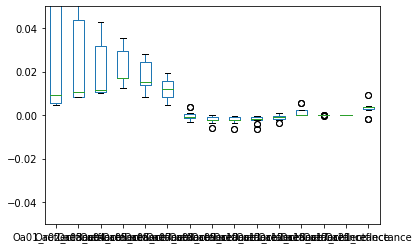

In [80]:
#Box plot for all of the bands
df_bands_only.plot(kind='box')
plt.ylim(-0.05, 0.05)
plt.show()

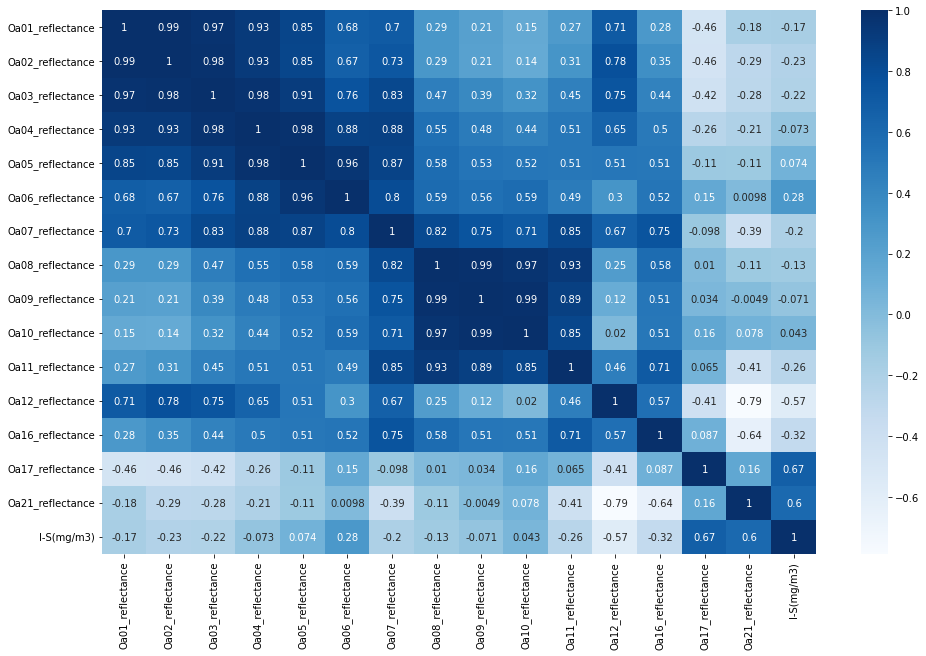

In [81]:
corr_matrix = df_Split_2019_filtered[['Oa01_reflectance','Oa02_reflectance','Oa03_reflectance','Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'Oa07_reflectance', 'Oa08_reflectance', 'Oa09_reflectance', 'Oa10_reflectance', 'Oa11_reflectance', 'Oa12_reflectance', 'Oa16_reflectance', 'Oa17_reflectance', 'Oa21_reflectance','I-S(mg/m3)']].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True,cmap='Blues')
plt.show()

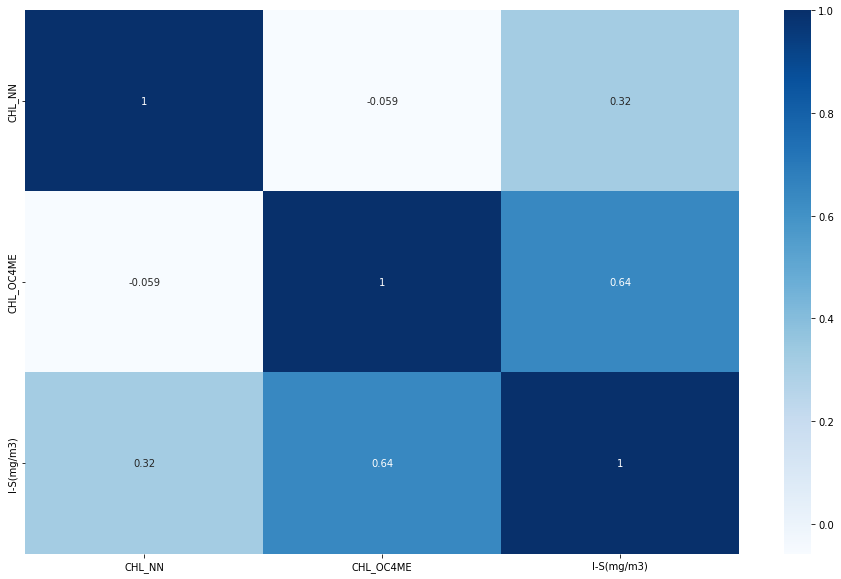

In [82]:
corr_matrix = df_Split_2019_filtered[['CHL_NN', 'CHL_OC4ME','I-S(mg/m3)']].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True,cmap='Blues')
plt.show()

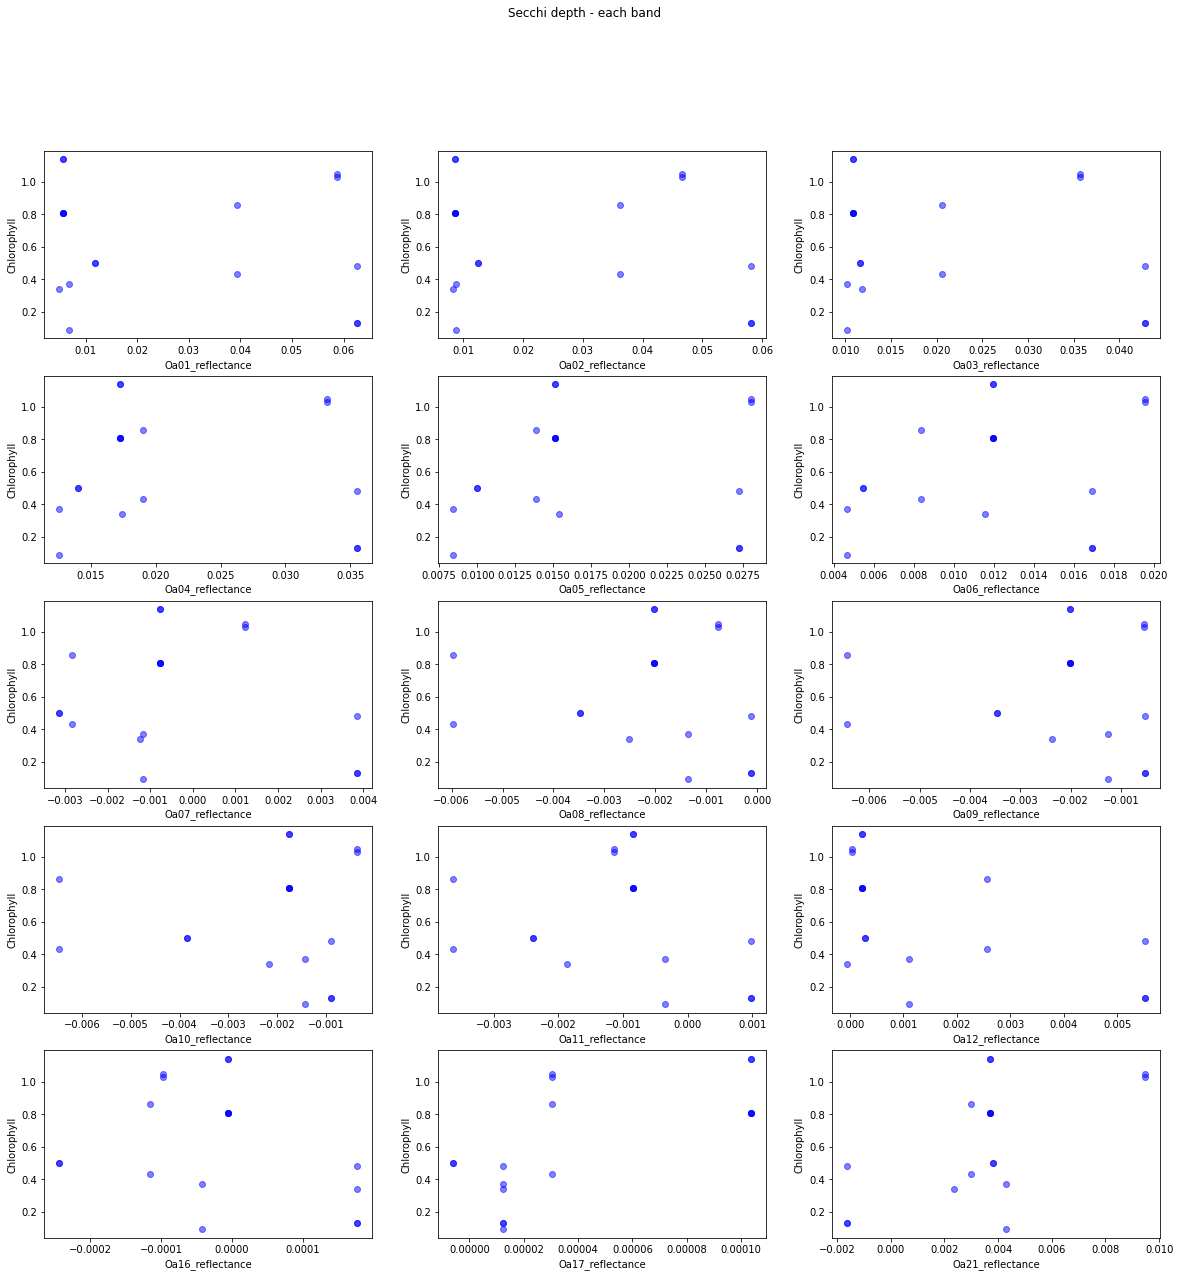

In [83]:
# band names

bands_names=['Oa01_reflectance','Oa02_reflectance','Oa03_reflectance','Oa04_reflectance', 'Oa05_reflectance', 'Oa06_reflectance', 'Oa07_reflectance', 'Oa08_reflectance', 'Oa09_reflectance', 'Oa10_reflectance', 'Oa11_reflectance', 'Oa12_reflectance', 'Oa16_reflectance', 'Oa17_reflectance', 'Oa21_reflectance']


 
fig, ax = plt.subplots(5, 3, figsize=(20, 20)) # fig size, rows and columns

plt.suptitle('Secchi depth - each band')


location=0

for j in range(0,5):

    for k in range(0,3):

        ax[j,k].scatter(df_Split_2019_filtered[bands_names[location]],df_Split_2019_filtered['I-S(mg/m3)'],alpha=0.5,color='blue')

        ax[j, k].set_ylabel('Chlorophyll')

        ax[j, k].set_xlabel(bands_names[location])

        location=location+1

In [84]:
razlika_Oa910 = []

for i in range(len(df_Split_2019_filtered)):
    razlika_Oa910.append(abs(df_Split_2019_filtered['Oa09_reflectance'][i] - df_Split_2019_filtered['Oa10_reflectance'][i]))

razlika_Oa910

[0.00018311106032342655,
 0.00018311106032342655,
 0.0002563554844527969,
 0.0002563554844527969,
 0.0002563554844527969,
 1.831110603234265e-05,
 1.831110603234265e-05,
 0.00038453322667919576,
 0.00038453322667919576,
 0.00038453322667919576,
 0.0002563554844527969,
 0.0002563554844527969,
 0.0002563554844527969,
 0.00038453322667919565,
 0.00038453322667919565,
 0.00020142216635576915,
 0.00018311106032342672,
 0.00018311106032342672]

In [85]:
razlika_Oa89 = []

for i in range(len(df_Split_2019_filtered)):
    razlika_Oa89.append(abs(df_Split_2019_filtered['Oa09_reflectance'][i] - df_Split_2019_filtered['Oa10_reflectance'][i]))

razlika_Oa89

[0.00018311106032342655,
 0.00018311106032342655,
 0.0002563554844527969,
 0.0002563554844527969,
 0.0002563554844527969,
 1.831110603234265e-05,
 1.831110603234265e-05,
 0.00038453322667919576,
 0.00038453322667919576,
 0.00038453322667919576,
 0.0002563554844527969,
 0.0002563554844527969,
 0.0002563554844527969,
 0.00038453322667919565,
 0.00038453322667919565,
 0.00020142216635576915,
 0.00018311106032342672,
 0.00018311106032342672]

In [86]:
df_Split_2019_filtered

,I-S(mg/m3),coordinates,date,img_type,lat,long,repl_img_type,rounded_time,Oa01_reflectance,Oa02_reflectance,...,Oa10_reflectance,Oa11_reflectance,Oa12_reflectance,Oa16_reflectance,Oa17_reflectance,Oa21_reflectance,CHL_NN,CHL_OC4ME,CHL_NN_err,CHL_OC4ME_err
0,1.03,"(43.51833, 16.38167)",2019-03-19 07:35:00,s3olci,43.518333,16.381667,NaN,2019-03-19,0.058809,0.046559,...,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479,0.313374,0.624131,0.084944,0.018523
1,1.05,"(43.53, 16.45333)",2019-03-19 08:40:00,s3olci,43.530000,16.453333,NaN,2019-03-19,0.058809,0.046559,...,-0.000354,-0.001141,0.000031,-0.000098,0.000031,0.009479,0.313374,0.624131,0.084944,0.018523
2,0.81,"(43.51833, 16.38167)",2019-04-15 08:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
3,0.81,"(43.51833, 16.38167)",2019-04-15 06:10:00,s3olci,43.518333,16.381667,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
4,1.14,"(43.53, 16.45333)",2019-04-15 11:20:00,s3olci,43.530000,16.453333,NaN,2019-04-15,0.005652,0.008527,...,-0.001764,-0.000848,0.000232,-0.000006,0.000104,0.003711,0.243123,1.075217,0.098203,0.042650
5,0.43,"(43.51833, 16.38167)",2019-06-10 06:10:00,s3olci,43.518333,16.381667,NaN,2019-06-10,0.039308,0.036177,...,-0.006470,-0.003632,0.002557,-0.000116,0.000031,0.002979,0.601904,0.362289,0.141126,0.013859
6,0.86,"(43.53, 16.45333)",2019-06-10 08:05:00,s3olci,43.530000,16.453333,NaN,2019-06-10,0.039308,0.036177,...,-0.006470,-0.003632,0.002557,-0.000116,0.000031,0.002979,0.601904,0.362289,0.141126,0.013859
7,0.13,"(43.51833, 16.38167)",2019-07-22 08:39:00,s3olci,43.518333,16.381667,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000
8,0.13,"(43.51833, 16.38167)",2019-07-22 06:00:00,s3olci,43.518333,16.381667,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000
9,0.48,"(43.53, 16.45333)",2019-07-22 09:35:00,s3olci,43.530000,16.453333,NaN,2019-07-22,0.062691,0.058187,...,-0.000903,0.000983,0.005524,0.000177,0.000012,-0.001636,0.169179,0.349387,0.065902,0.010000


# Linearna regresija

In [115]:
attempts = 100
errors = np.zeros(attempts)
r2scores = np.zeros(attempts)

for i in range(attempts):
    train, test = train_test_split(df_Split_2019_filtered, test_size=0.27, random_state=i*i)

    X_train = train[['CHL_NN', 'CHL_NN_err']]
    y_train = train['I-S(mg/m3)']

    X_test = test[['CHL_NN', 'CHL_NN_err']]
    y_test = test['I-S(mg/m3)']

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    errors[i] = np.sqrt(mean_squared_error(y_test, y_pred))
    r2scores[i] = r2_score(y_test, y_pred)

print('Model: Linear Regression')
print('Mean squared error:', np.mean(errors))
print('Mean R2 score:', np.mean(r2scores))


Model: Linear Regression
Mean squared error: 0.35734952630582006
Mean R2 score: -1.4584241982009893


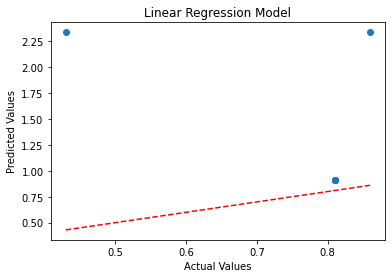

In [116]:
# Plotting the linear regression model
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

In [117]:
attempts = 100
errors = np.zeros(attempts)
r2scores = np.zeros(attempts)

for i in range(attempts):
    train, test = train_test_split(df_Split_2019_filtered, test_size=0.2, random_state=i*i)

    X_train = train[['CHL_OC4ME', 'CHL_OC4ME_err']]
    y_train = train['I-S(mg/m3)']

    X_test = test[['CHL_OC4ME', 'CHL_OC4ME_err']]
    y_test = test['I-S(mg/m3)']

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    errors[i] = np.sqrt(mean_squared_error(y_test, y_pred))
    r2scores[i] = r2_score(y_test, y_pred)

print('Model: Linear Regression')
print('Mean squared error:', np.mean(errors))
print('Mean R2 score:', np.mean(r2scores))


Model: Linear Regression
Mean squared error: 0.30066188821474316
Mean R2 score: -0.8746551802787983


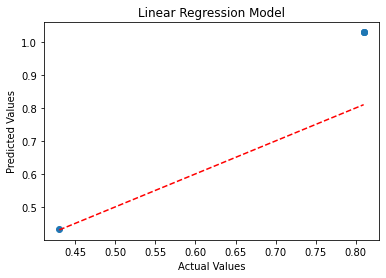

In [118]:
# Plotting the linear regression model
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()